# Business Case: Utilize an appropriate machine learning model to predict whether the client subscribed to the term deposit or not.


The ultimate goal of this data is to predict which clients are most likely to subscribe to a term deposit. This prediction will enable more efficient implementation of targeted campaigns. Creating a predictive model to assist the bank's marketing team in identifying whether a client has subscribed to a term deposit is a commonly used case in data analytics and machine learning.

# Problem statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:-Create a predictive model which will help the bank marketing team to know
   which client will subscribe to a term deposit or not.
* Task3:-Suggestions to the Bank market team to make customers buy the product.

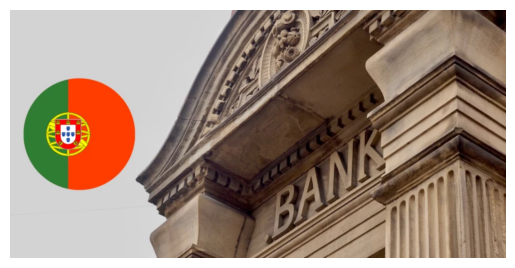

In [13]:
img=plt.imread('mortgage-in-turkey-4-900x450.webp')
plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [15]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [16]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

# Domain Analysis

### In this dataset, we have 21 columns of parameters for sales prediction  and 41188 rows of data.

## Bank client data:

* Age (numeric)
* Job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
* Marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* Education (categorical: basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degr,unknown)
* Default: has credit in default? (categorical: "yes","no",'unknown')
* Housing: has housing loan? (categorical: "yes","no",'unknown')
* Loan: has personal loan? (categorical: "yes","no",'unknown')

## Related with the last contact of the current campaign:

* contact: contact communication type (categorical:"telephone","cellular")
* day_of_week: last contact day of the week (categorical:mon,tue,wed,thu,fri)
* month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* duration: last contact duration, in seconds (numeric)

## Other attributes:

**campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)**

  * The term "campaign" refers to the number of times a marketing or outreach effort has been made to a specific client. It represents the total count of contacts or interactions initiated by the marketing team with a particular client during a specific campaign, which may include the final contact made.
  
**pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, 999 means client was not previously contacted)**

  * The term "pdays" stands for "number of days that passed by after the client was last contacted from a previous campaign." It represents the amount of time that has elapsed since the client's most recent contact with the marketing team from a prior campaign.
  * If the value is 999, it typically means that the client was not previously contacted in any prior campaign. In other words, 999 serves as a code to signify that there was no recent interaction with the client before this campaign.
  
**previous: number of contacts performed before this campaign and for this client (numeric)**

 * The term "previous" refers to the "number of contacts performed before this campaign and for this client." It represents the total count of interactions or contacts that the marketing team has had with a specific client prior to the current campaign.
 *  It's a numerical field that indicates the count of previous interactions or contacts.
 
**poutcome: outcome of the previous marketing campaign (categorical: "nonexistent","failure","success")**

 * The term "poutcome" refers to the "outcome of the previous marketing campaign." It provides information about what happened as a result of the client's interaction in the previous campaign.
 
 * "nonexistent": This means that there was no previous marketing campaign for the client, or there was no recorded outcome because the client was not part of any prior campaign.

* "failure": This indicates that the previous marketing campaign did not succeed or was not fruitful in achieving its intended goals when dealing with the client.

* "success": This signifies that the previous marketing campaign was successful in achieving its objectives when dealing with the client.

In summary, "poutcome" helps the marketing team understand the historical outcome of interactions with the client in prior campaigns, whether they were successful, unsuccessful, or if there were no prior interactions at all ("nonexistent").

##  social and economic context attributes:

**emp.var.rate: employment variation rate - quarterly indicator (numeric)** 

* The term "emp.var.rate" stands for "employment variation rate," and it's a quarterly indicator represented as a numeric value. In simple terms, it refers to the rate at which employment conditions or the job market is changing over a specific quarter.

**cons.price.idx: consumer price index - monthly indicator (numeric)**

* The term "cons.price.idx" stands for "consumer price index," and it's a monthly indicator represented as a numeric value. In simple terms, it is a measure that tracks changes in the average prices paid by consumers for a basket of goods and services over time.

**cons.conf.idx: consumer confidence index - monthly indicator (numeric)**
 * The term "cons.conf.idx" stands for "consumer confidence index," and it's a monthly indicator represented as a numeric value. In simple terms, it measures the level of confidence or optimism that consumers have about the current and future economic situation.
 
**eribor3m: euribor 3 month rate - daily indicator (numeric)

* The term "eribor3m" stands for "EURIBOR 3-month rate," and it's a daily indicator represented as a numeric value. In simple terms, it is the interest rate at which European banks lend to each other for a period of three months in euros.


* Daily Indicator: This means that the rate can change daily based on market conditions and the supply and demand for funds in the interbank lending market.


* EURIBOR (Euro Interbank Offered Rate) is an important benchmark interest rate for the eurozone. It serves as a reference rate for various financial products and transactions, including loans, mortgages, and financial derivatives. 


**nr.employed: number of employees - quarterly indicator (numeric)**

* The term "nr.employed" stands for "number of employees," and it's a quarterly indicator represented as a numeric value. In simple terms, it refers to the total number of people employed in a specific region or industry during a particular quarter.


* Quarterly Indicator: This means that the number of employees can vary from one quarter to the next due to factors such as economic conditions, seasonal changes, and industry-specific dynamics.

## Output variable (desired target):

* y - has the client subscribed a term deposit? (binary: "yes", "no")

#### Task 1:-Prepare a complete data analysis report on the given data.

# BASIC CHECK

In [17]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [18]:
df.head((pd.set_option('display.max_columns',None)))

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [19]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
41183  cellular   nov         fri       334         1    999         0   
41184  cellular   nov         fri       383         1    999         0   
41185  cellular   nov         fri       189         2    999         0   
41186  cellular   nov         fri       442         1    999         0   
41187  cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [21]:
df.shape

(41188, 21)

In [22]:
df.size

864948

In [23]:
df.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [24]:
# to represent the statistical values of categorical values
df.describe(include='O')

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [25]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [26]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [28]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Exploratory data analysis

## Univatiate 

In [29]:
import sweetviz as sv
my_report=sv.analyze(df)
my_report.show_html("my_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [30]:
# storing all categorical columns in data1
data1=df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']]

In [31]:
# storing all numerical columns in data2
data2=df[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

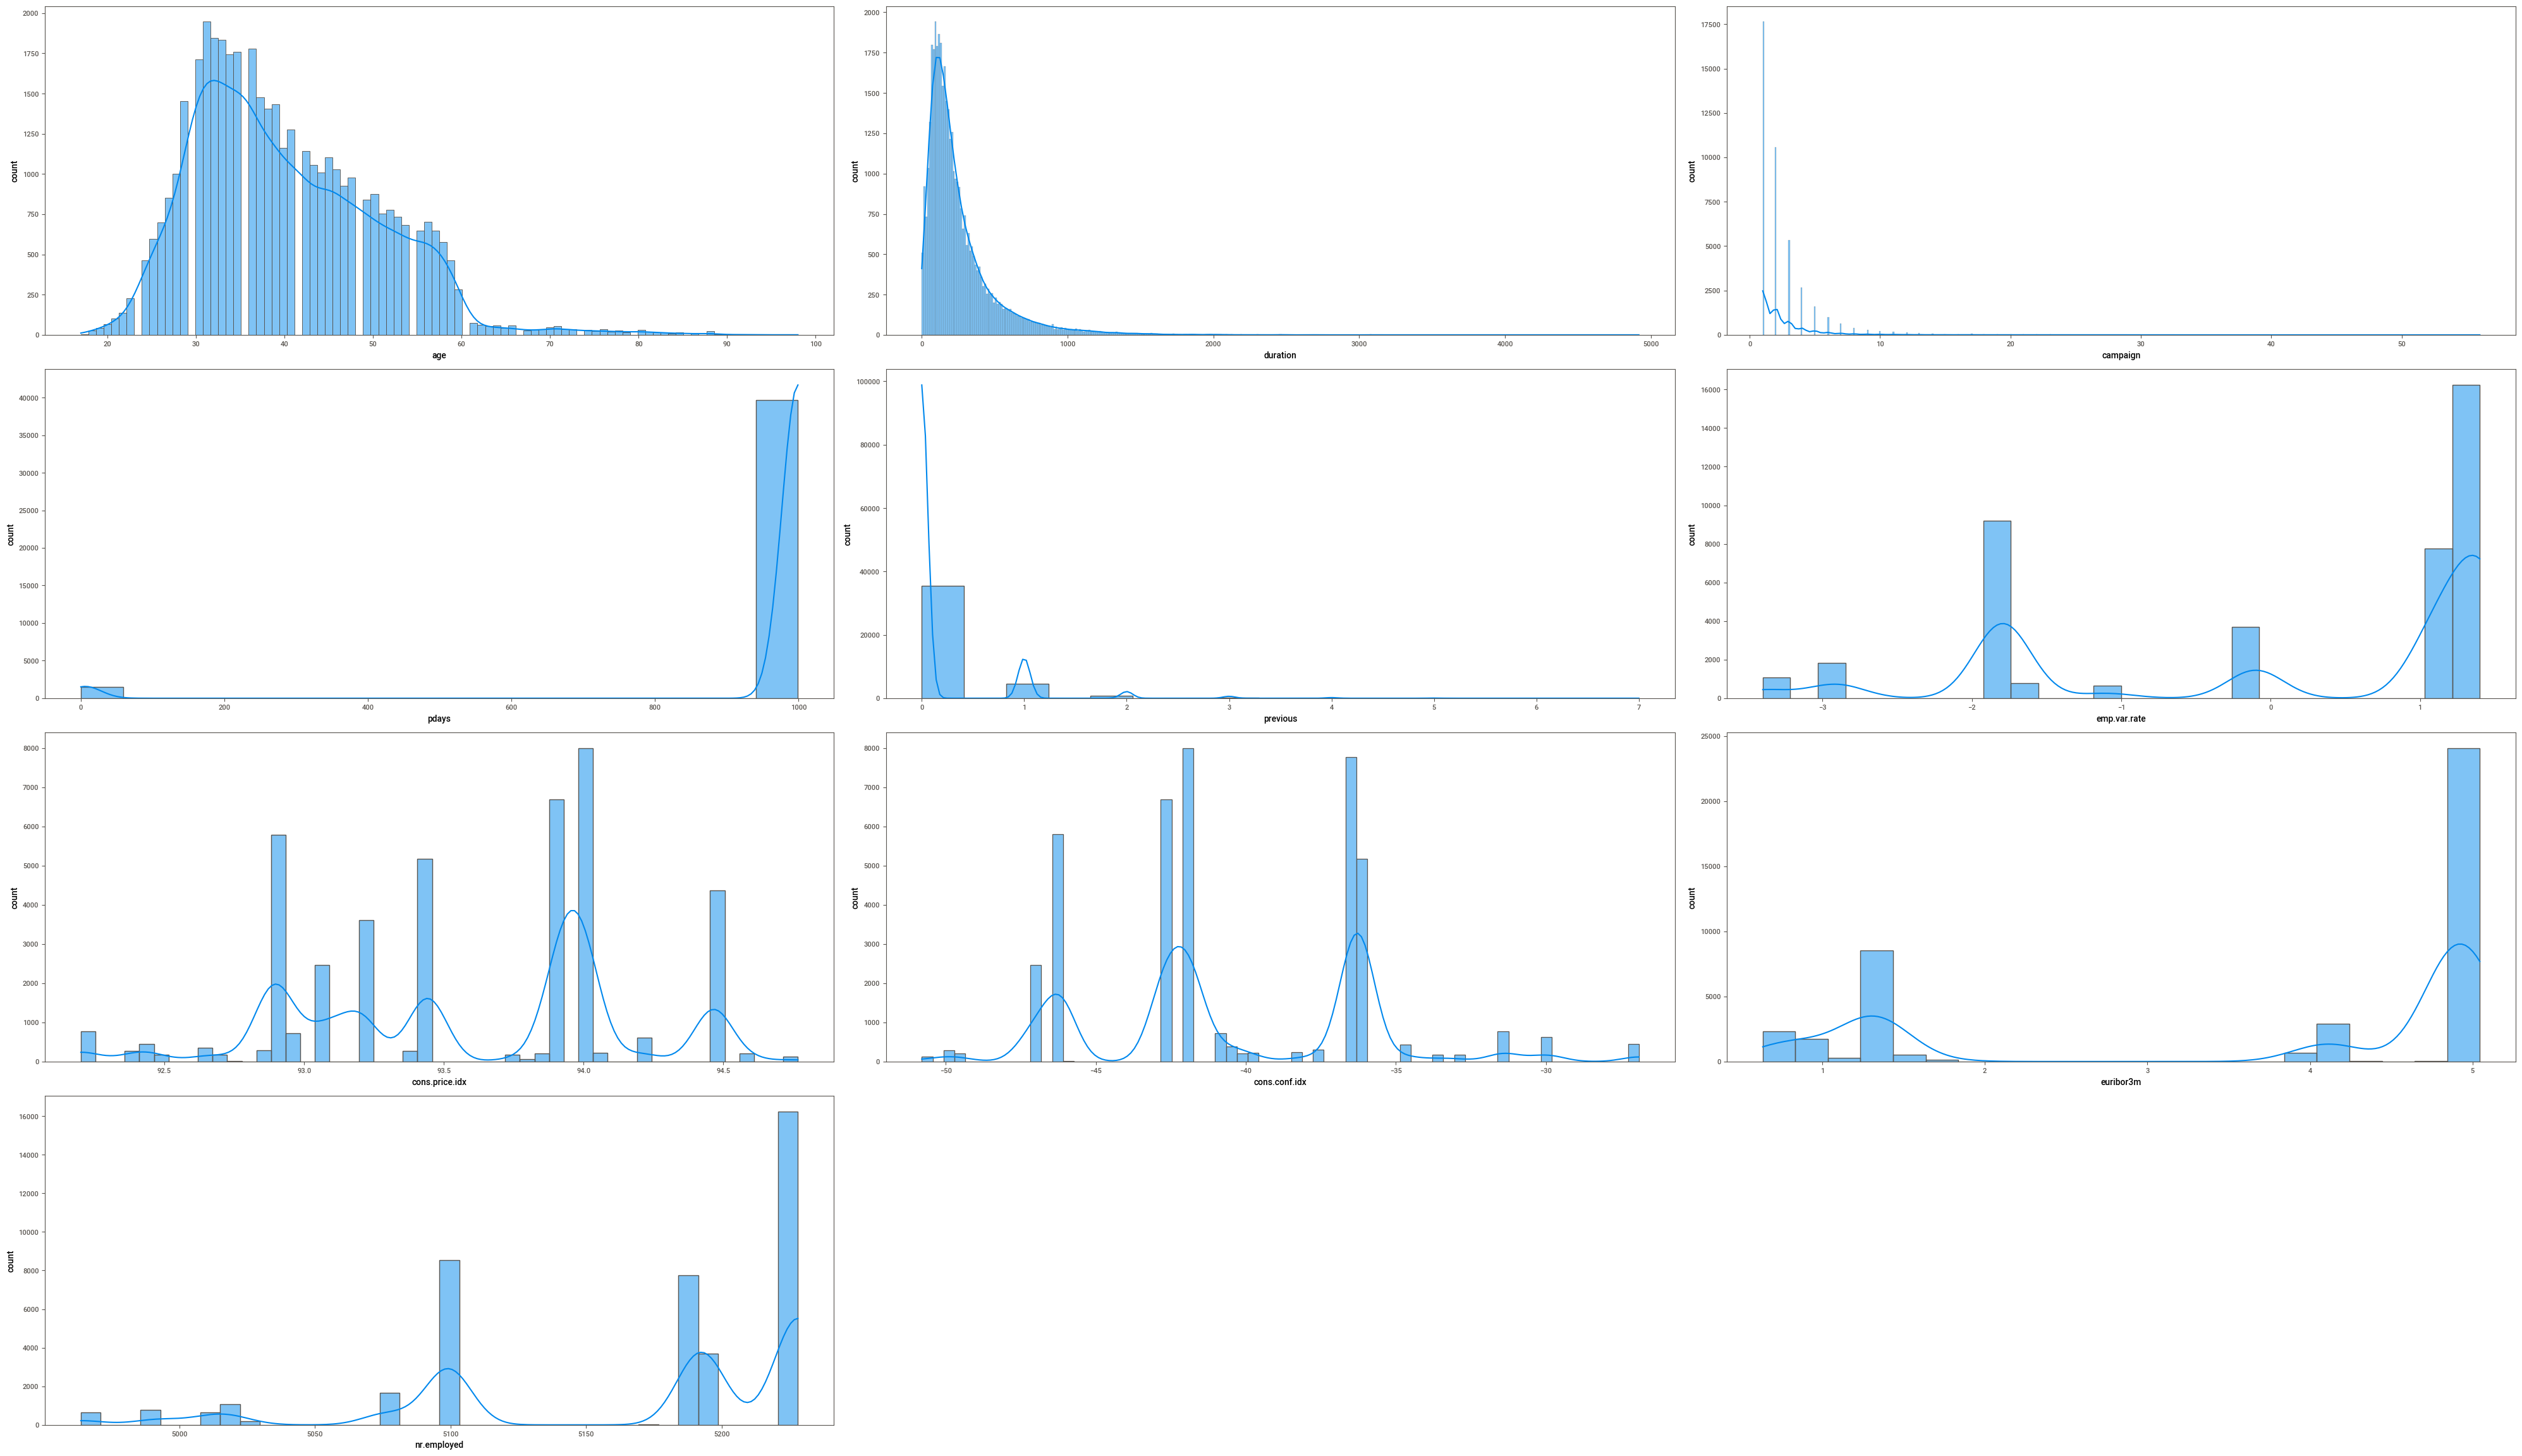

In [32]:
# for numerical columns
plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in data2:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.histplot(x=df[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

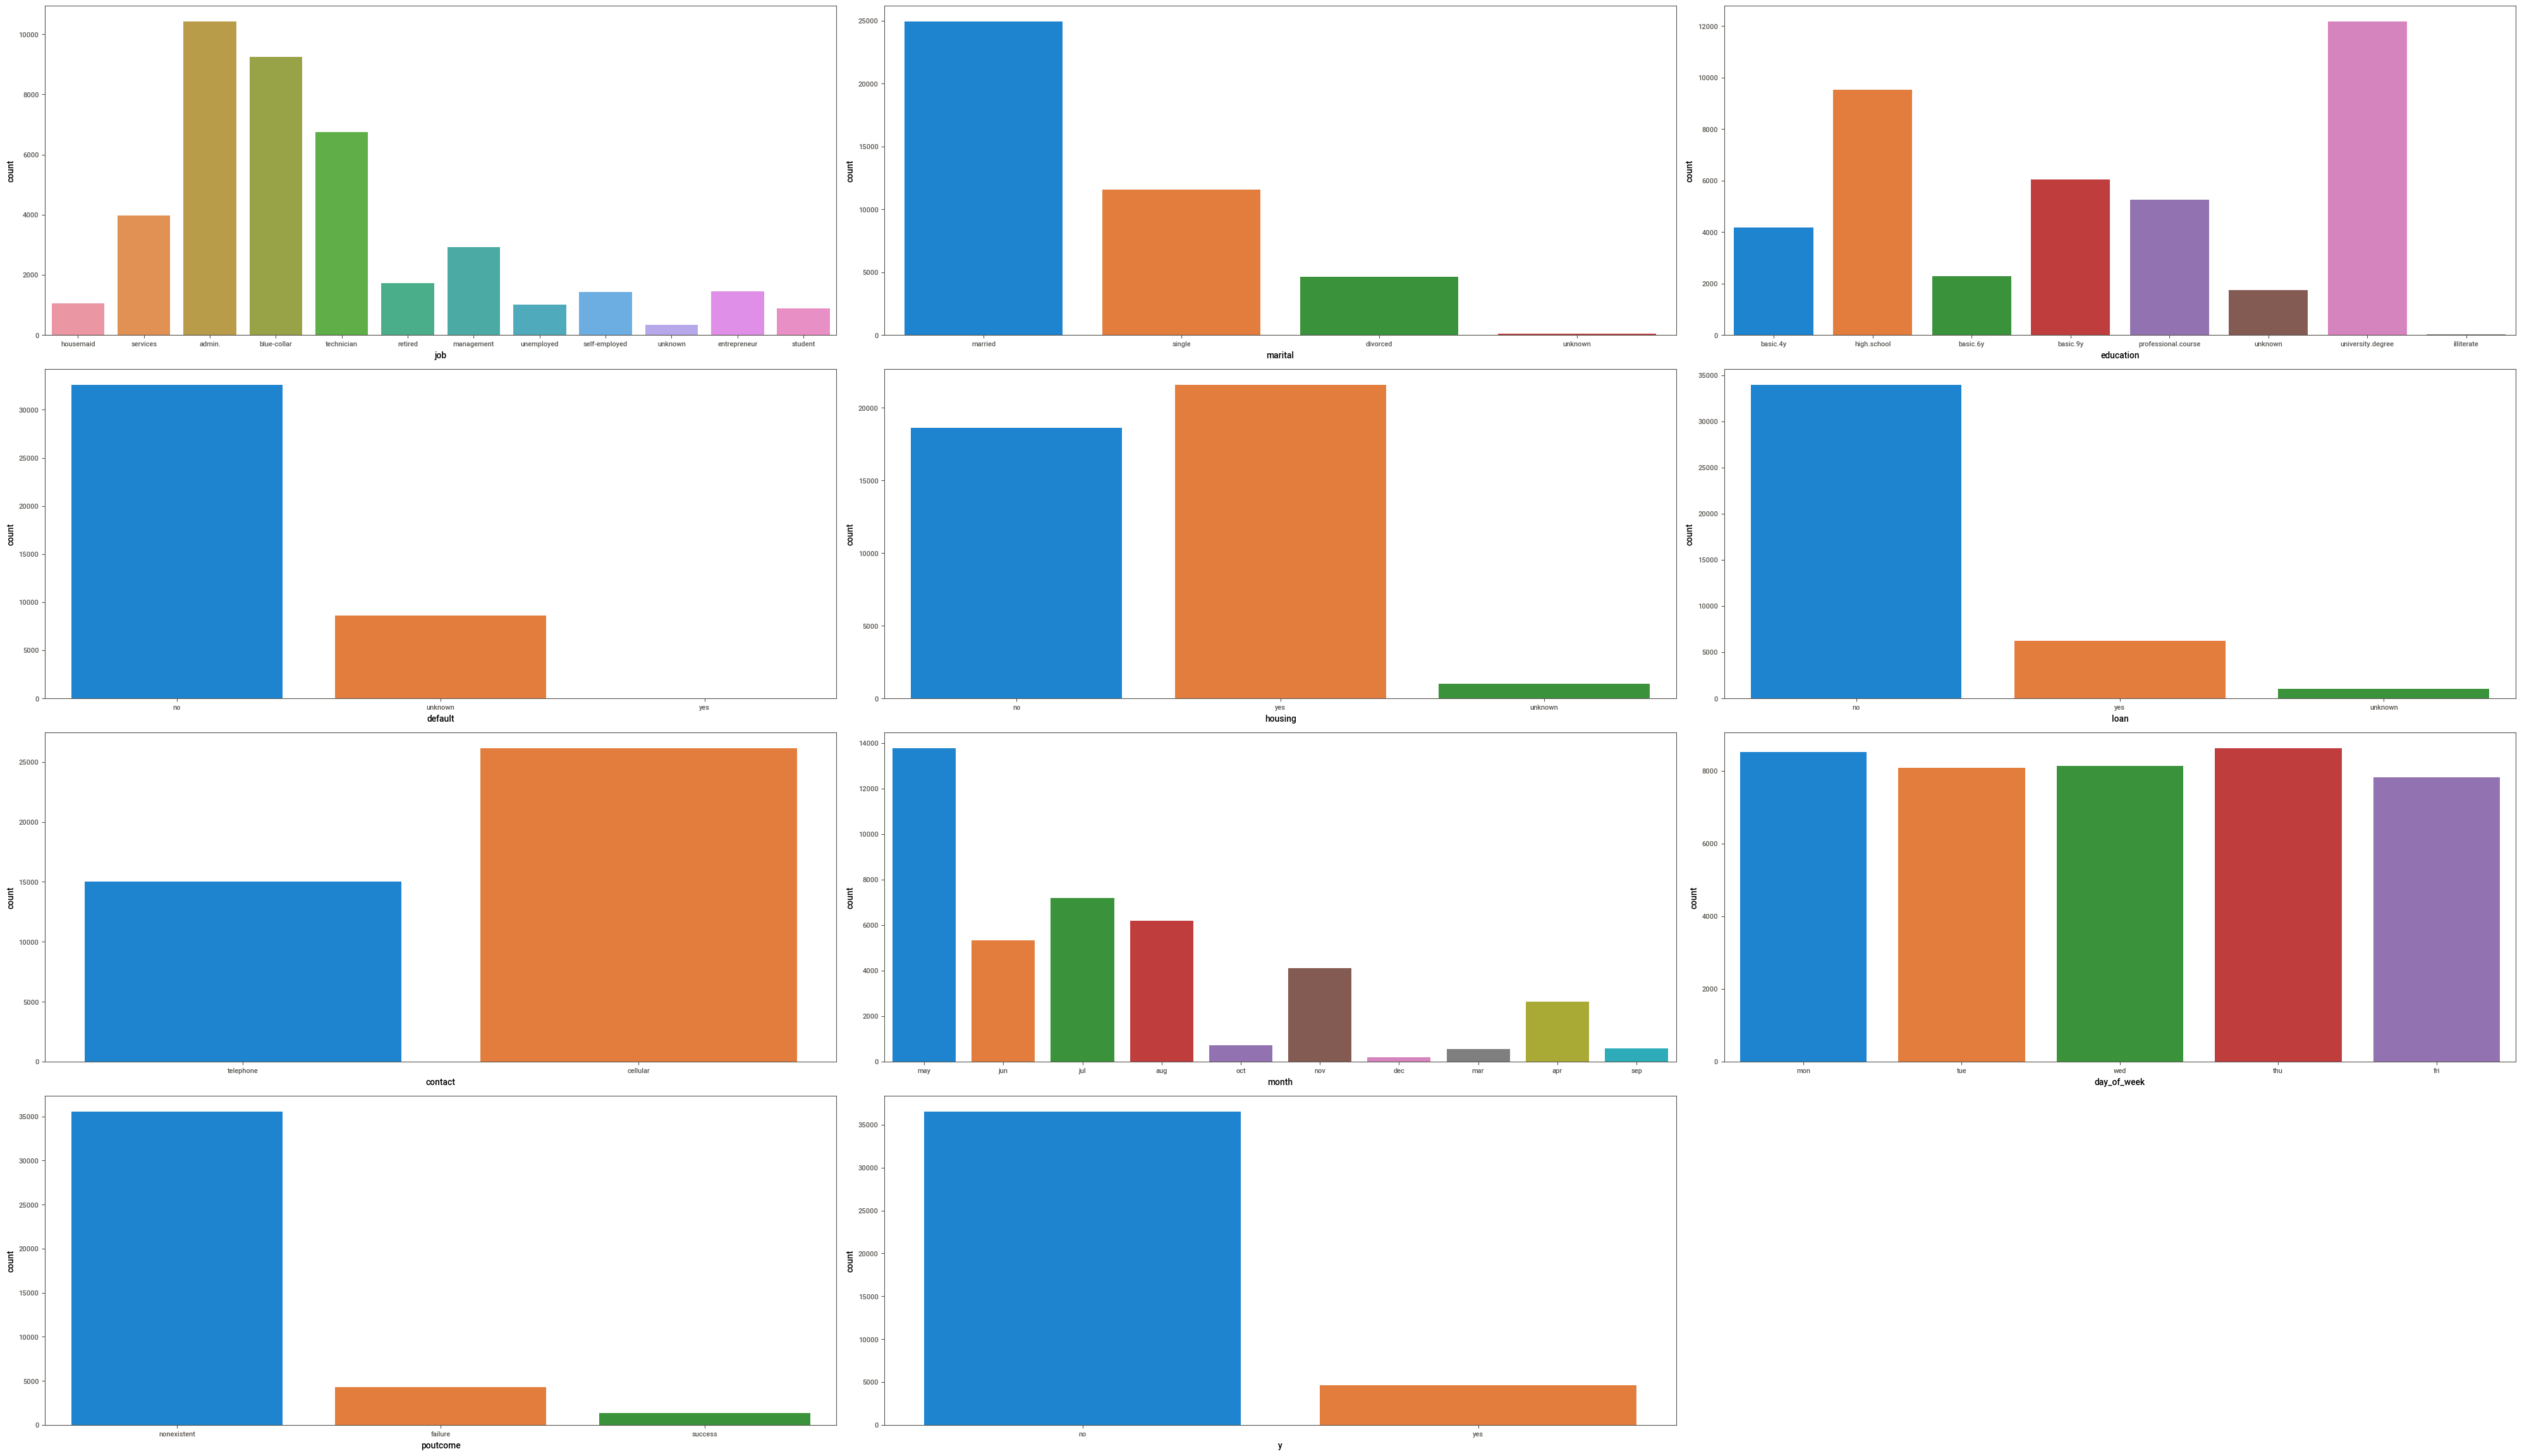

In [33]:
# for categorical columns
plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in data1:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.countplot(x=df[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Bivariate

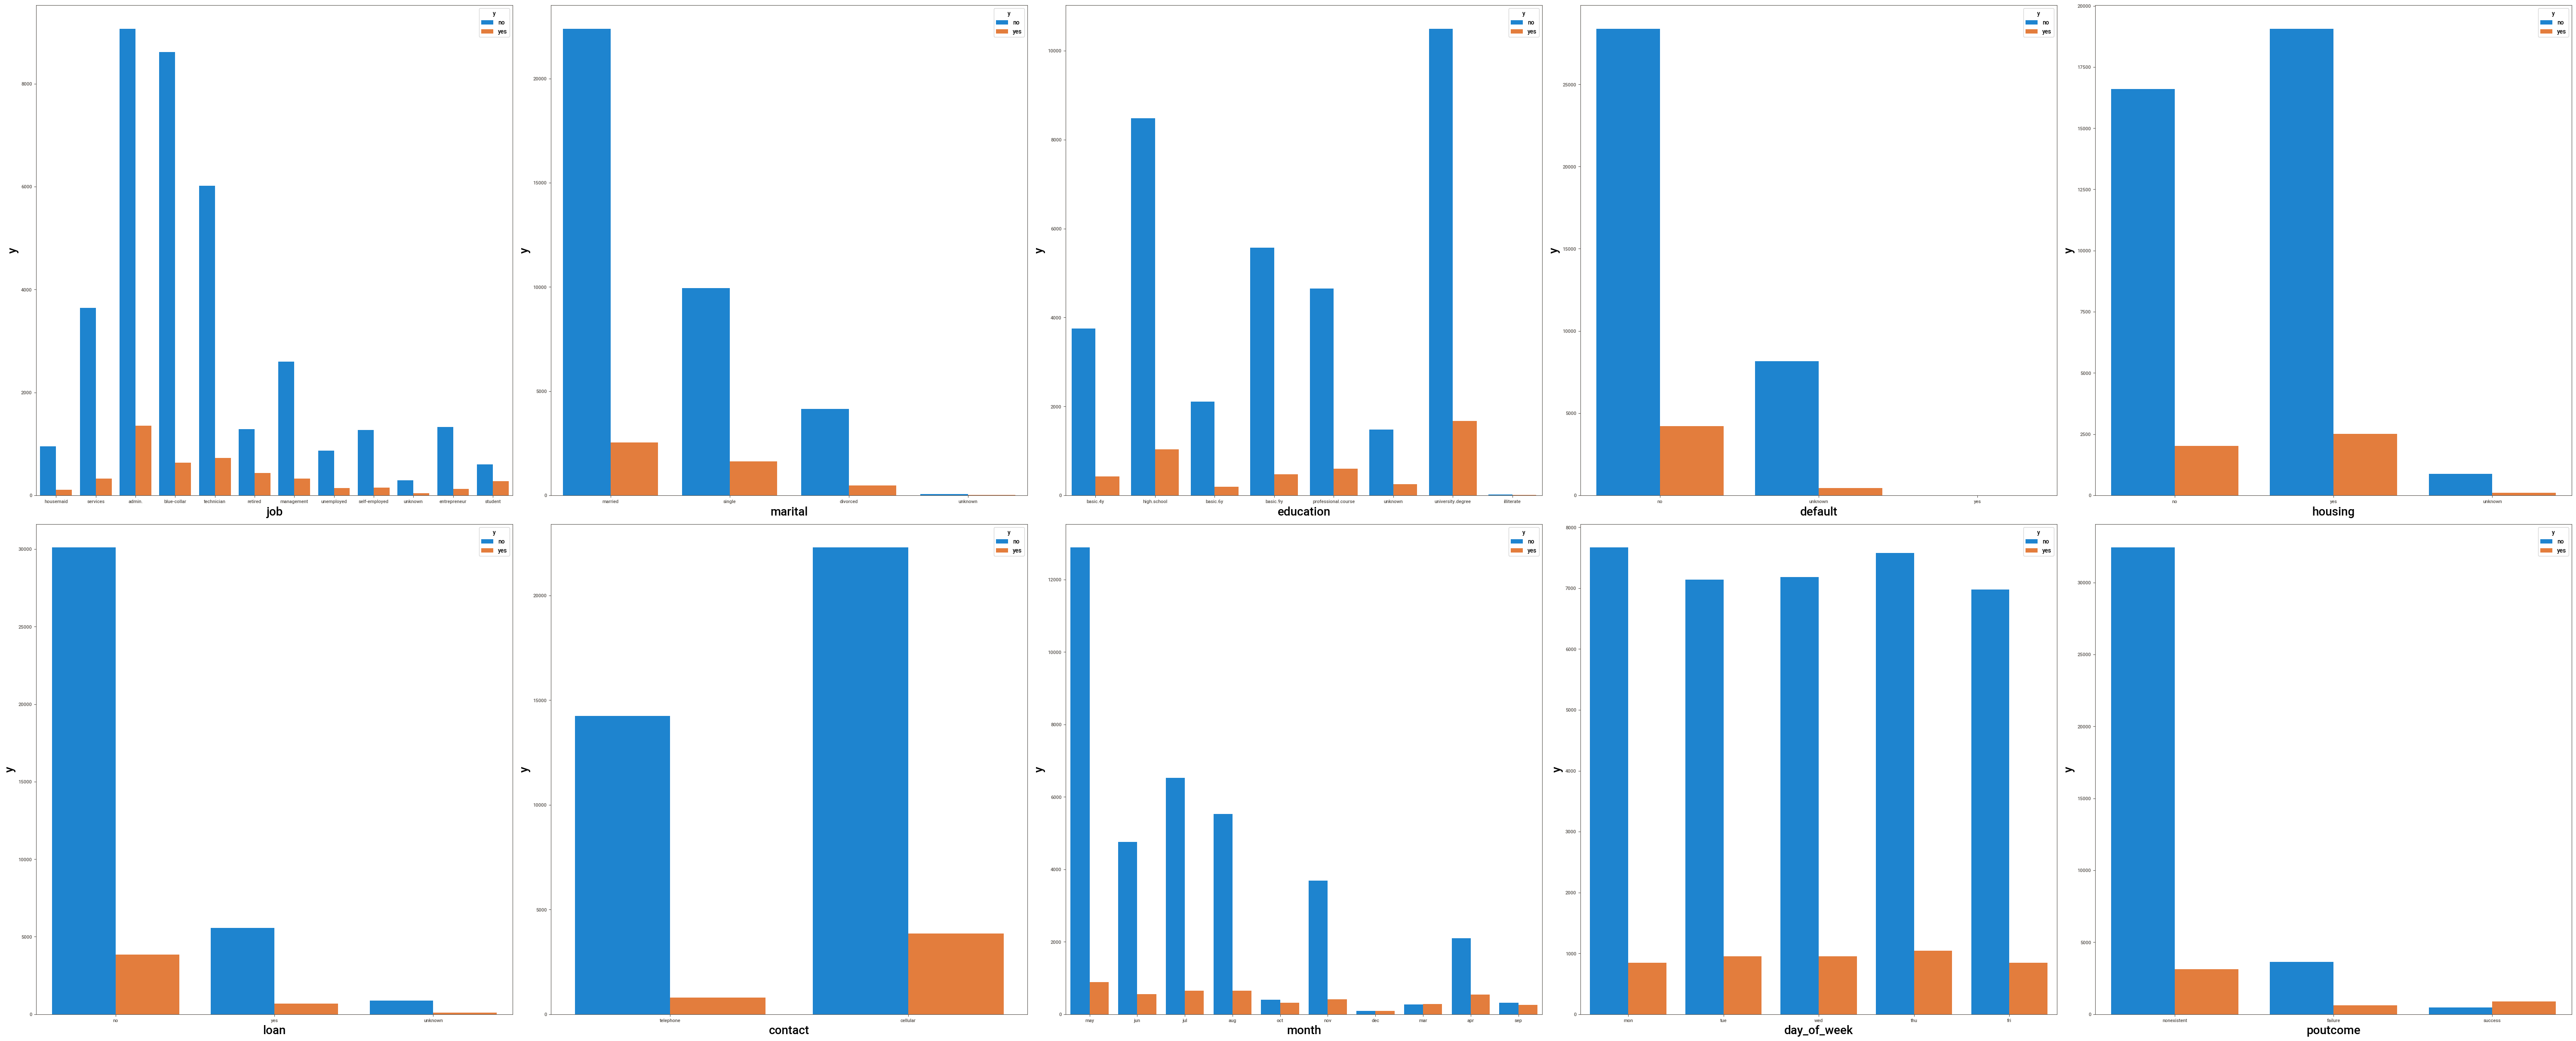

In [34]:
# categorical columns
plt.figure(figsize=(60,60),facecolor='white')
plotnumber=1
for column in data1:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=df[column],hue=df['y'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("y",fontsize=20)
    plotnumber+=1
plt.tight_layout()

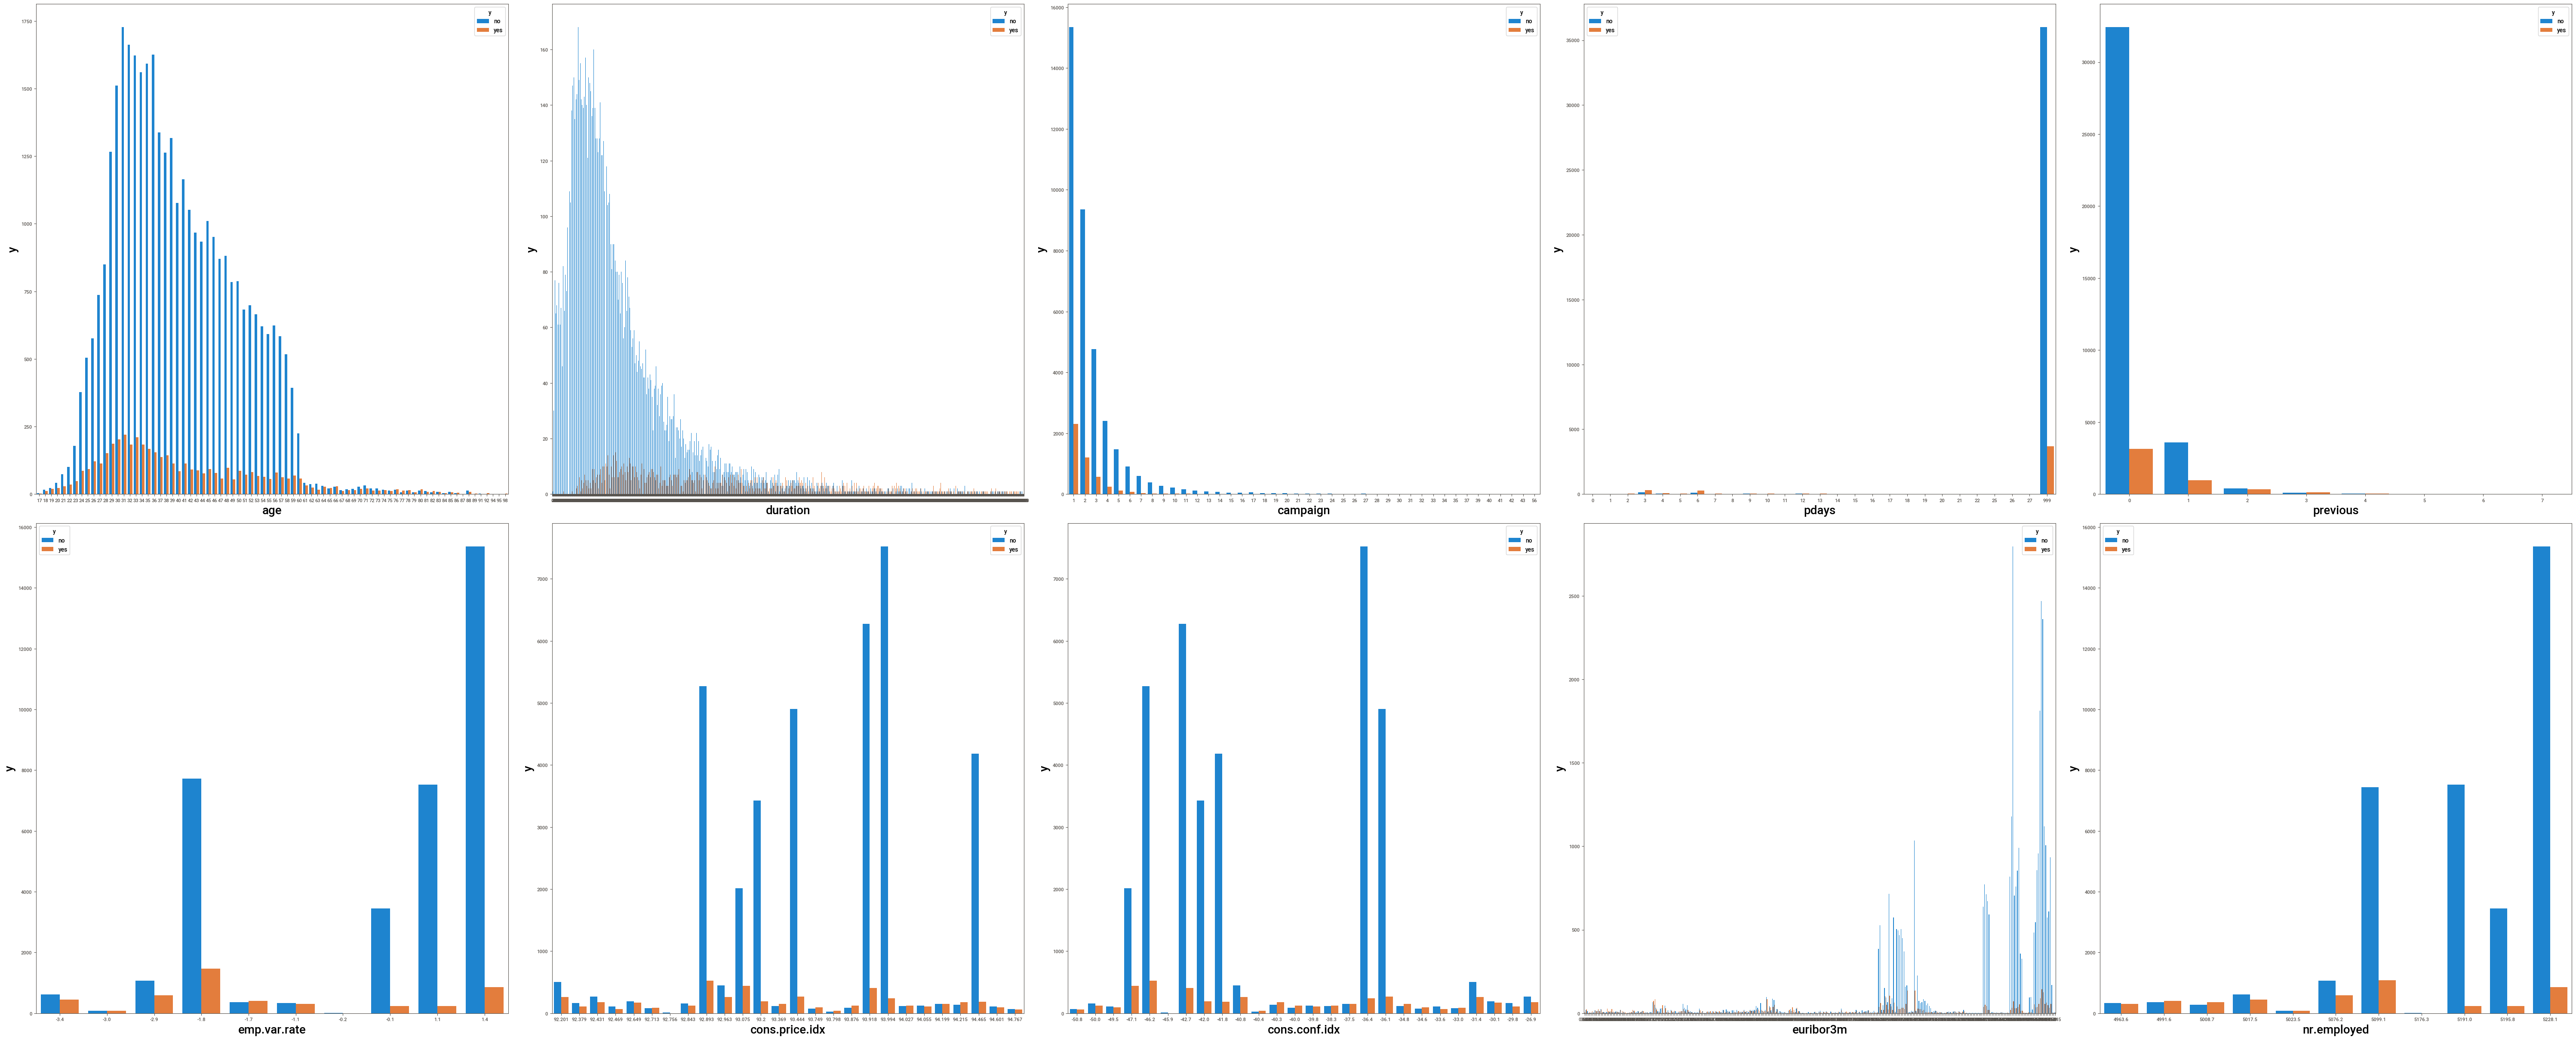

In [35]:
# numerical columns
plt.figure(figsize=(60,60),facecolor='white')
plotnumber=1
for column in data2:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=df[column],hue=df['y'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("y",fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Multivariate 

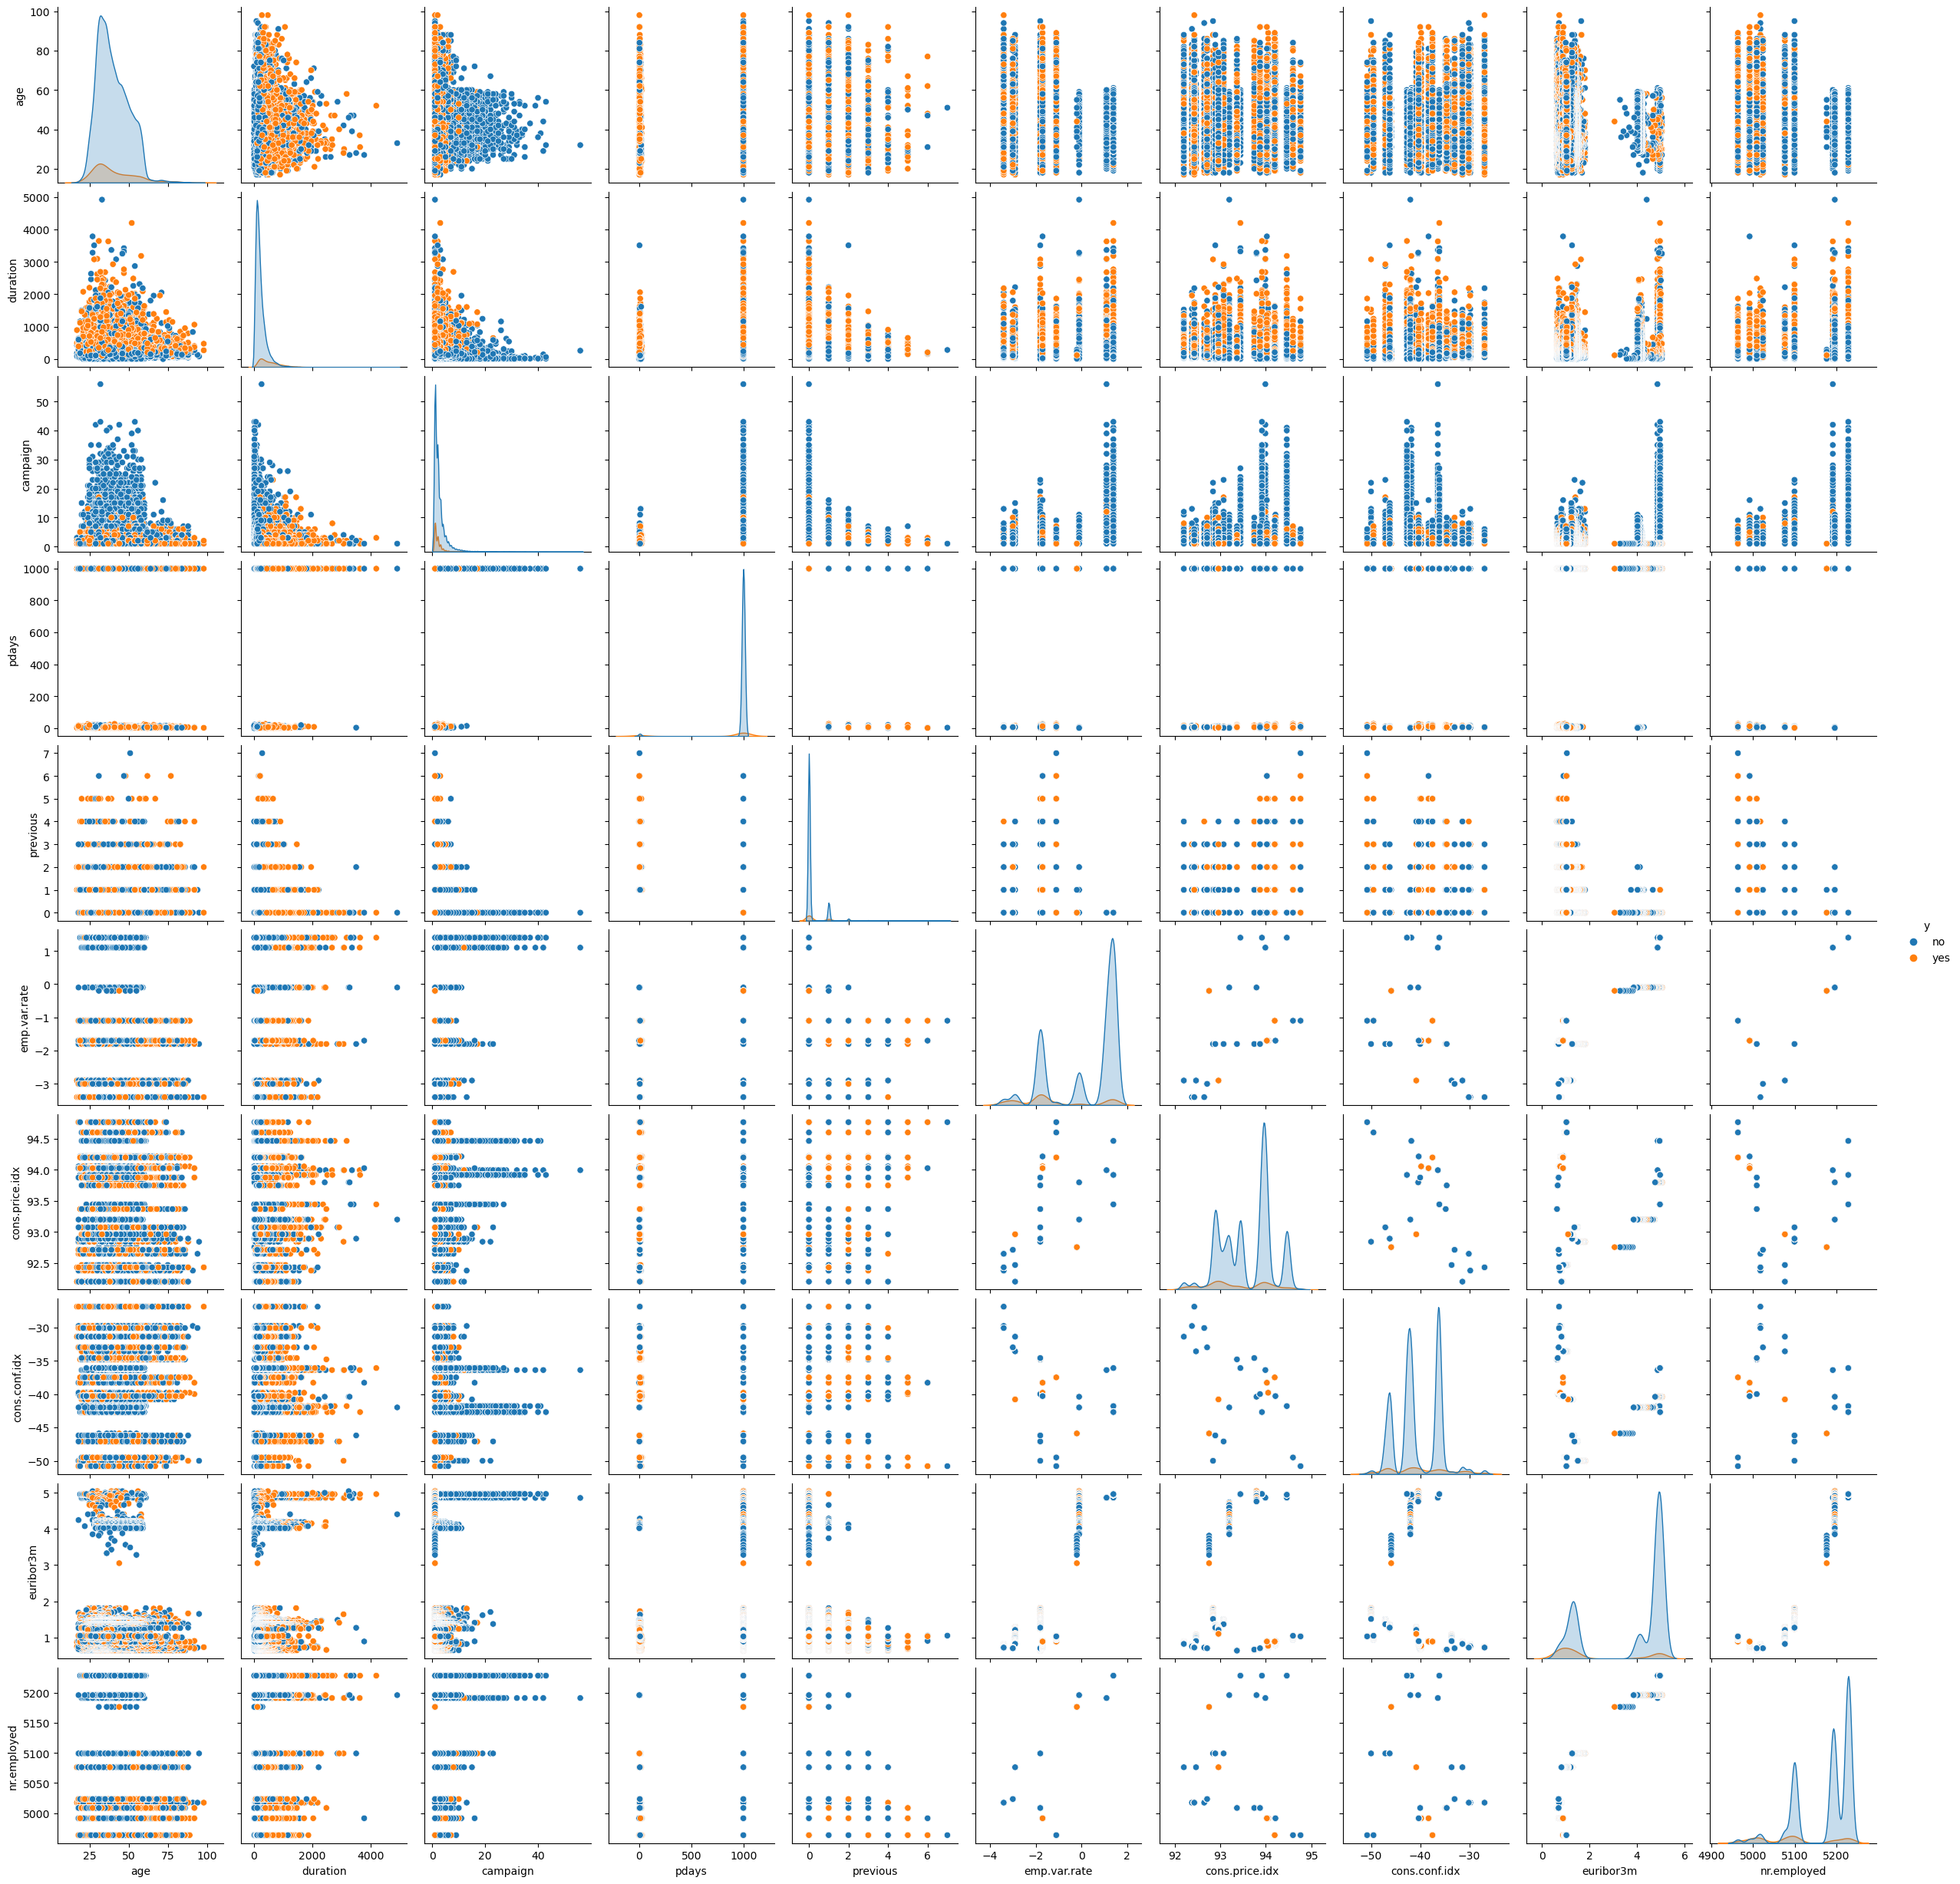

In [28]:
sns.pairplot(data=df,hue='y')

# Data Preprocessing

In [36]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [37]:
df.duplicated().sum()

12

In [38]:
df.drop(df[df.duplicated()].index,inplace=True)

In [39]:
df.duplicated().sum()

0

### check for outliers

In [40]:
num_data=df.select_dtypes(include=["int64","float64"])

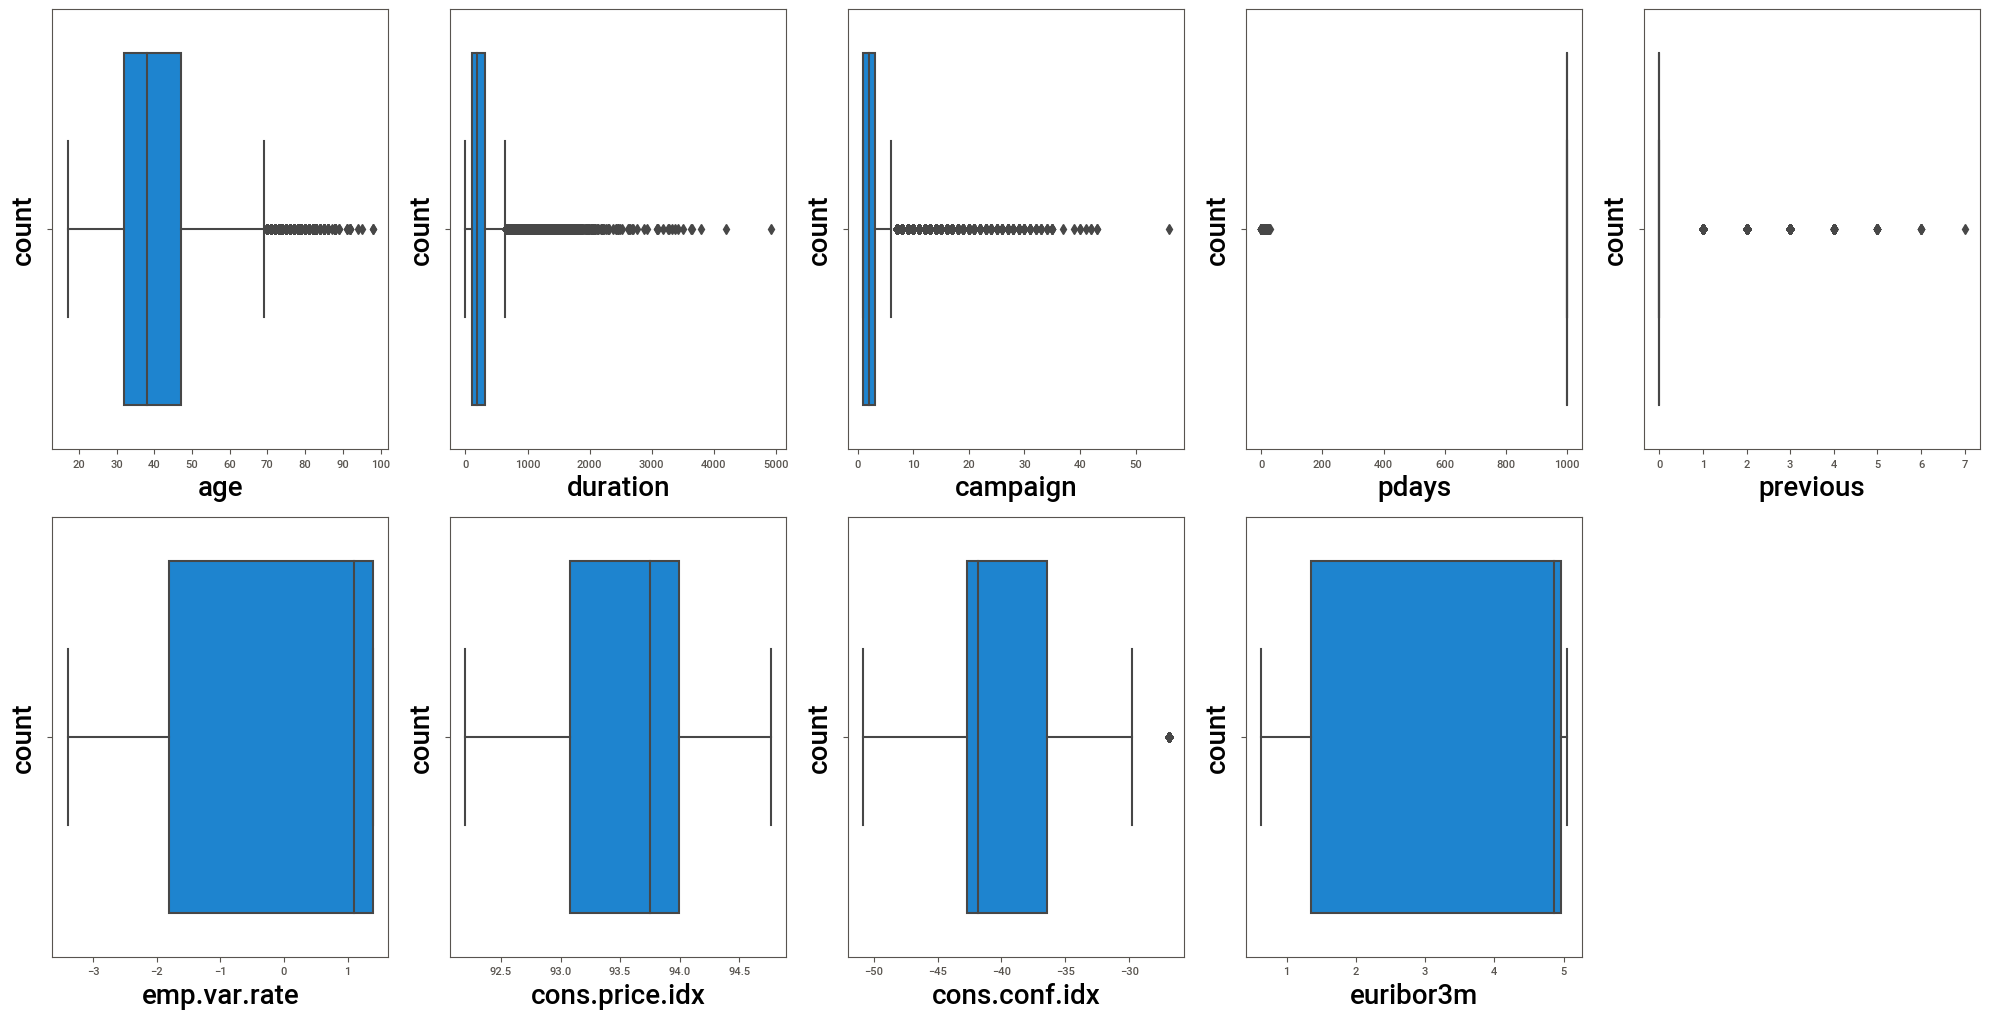

In [42]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_data:
    if plotnumber<10:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Outliers handling 

### To handle outliers, we use the IQR and the 3-Sigma rule. In this case, the data is not normal, so we use the IQR method.

### age

In [43]:
# How to find outliers in Age
Q1=df['age'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['age'].quantile(0.75)
print('upper quartile',Q3)

lower quartile 32.0
upper quartile 47.0


In [44]:
# Find IQR
IQR=Q3-Q1
IQR

15.0

In [45]:
# How to find the Outliers in age
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is 9.5
upper limit is 69.5


In [46]:
# Find values above upper limit 
df.loc[df['age']>upper_limit]

age      job   marital            education  default housing loan  \
27713   70  retired  divorced             basic.4y       no     yes   no   
27757   76  retired   married    university.degree       no      no  yes   
27780   73  retired   married    university.degree       no     yes   no   
27800   88  retired  divorced             basic.4y       no     yes   no   
27802   88  retired  divorced             basic.4y       no      no   no   
...    ...      ...       ...                  ...      ...     ...  ...   
40986   84  retired  divorced             basic.4y  unknown     yes  yes   
40996   81  retired   married             basic.4y       no     yes   no   
41004   80  retired   married  professional.course       no     yes   no   
41183   73  retired   married  professional.course       no     yes   no   
41187   74  retired   married  professional.course       no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
27713  cellular   mar         mon       187         3    999         0   
27757  cellular   mar         thu       167         9    999         0   
27780  cellular   mar         tue       179         1    999         1   
27800  cellular   mar         wed        48         1    999         0   
27802  cellular   mar         wed       266         2    999         0   
...         ...   ...         ...       ...       ...    ...       ...   
40986  cellular   oct         mon       138         4      3         1   
40996  cellular   oct         wed       621         1    999         2   
41004  cellular   oct         thu       411         1    999         1   
41183  cellular   nov         fri       334         1    999         0   
41187  cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
27713  nonexistent          -1.8          92.843          -50.0      1.811   
27757  nonexistent          -1.8          92.843          -50.0      1.757   
27780      failure          -1.8          92.843          -50.0      1.687   
27800  nonexistent          -1.8          92.843          -50.0      1.663   
27802  nonexistent          -1.8          92.843          -50.0      1.663   
...            ...           ...             ...            ...        ...   
40986      success          -1.1          94.601          -49.5      1.000   
40996      failure          -1.1          94.601          -49.5      1.016   
41004      failure          -1.1          94.601          -49.5      1.025   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
27713       5099.1  yes  
27757       5099.1   no  
27780       5099.1   no  
27800       5099.1   no  
27802       5099.1  yes  
...            ...  ...  
40986       4963.6   no  
40996       4963.6  yes  
41004       4963.6  yes  
41183       4963.6  yes  
41187       4963.6   no  

[468 rows x 21 columns]

In [47]:
# find percentage of outliers 
len(df.loc[df['age']>upper_limit])/len(df)

0.011365844181076355

In [48]:
len(df.loc[df['age']>upper_limit])/len(df)*100

1.1365844181076354

In [49]:
# Find the values below lower limit 
df.loc[df['age']<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

#### Since data is not normal and percentage of outliers is less than 5%,it will replace these outliers with median.

In [50]:
df.loc[df['age']>upper_limit,'age']=df['age'].median()

### Check if the outliers were replaced by plotting a graph

<Axes: xlabel='age'>

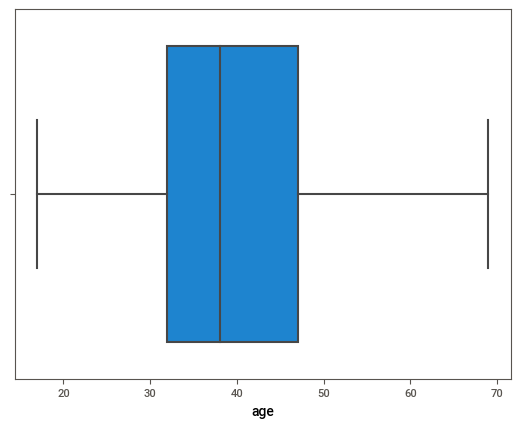

In [51]:
sns.boxplot(x=df.age)

### duration 

In [52]:
# How to find outliers in duration
Q1=df['duration'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['duration'].quantile(0.75)
print('upper quartile',Q3)

lower quartile 102.0
upper quartile 319.0


In [53]:
# Find IQR
IQR=Q3-Q1
IQR

217.0

In [54]:
# How to find the Outliers in duration
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is -223.5
upper limit is 644.5


In [55]:
# Find values above upper limit 
df.loc[df['duration']>upper_limit]

age           job   marital            education  default housing loan  \
37      52    technician   married             basic.9y       no     yes   no   
57      45      services   married          high.school  unknown     yes   no   
61      51   blue-collar   married             basic.9y       no     yes   no   
75      41   blue-collar  divorced             basic.4y  unknown     yes   no   
83      49  entrepreneur   married    university.degree  unknown     yes   no   
...    ...           ...       ...                  ...      ...     ...  ...   
41147   25    technician    single  professional.course       no     yes   no   
41153   67     housemaid  divorced  professional.course       no     yes   no   
41160   33        admin.   married    university.degree       no      no   no   
41164   54        admin.   married  professional.course       no      no   no   
41166   32        admin.   married    university.degree       no      no   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
37     telephone   may         mon      1666         1    999         0   
57     telephone   may         mon       787         1    999         0   
61     telephone   may         mon       812         1    999         0   
75     telephone   may         mon      1575         1    999         0   
83     telephone   may         mon      1042         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41147   cellular   nov         fri       712         2     19         1   
41153   cellular   nov         mon       655         2      5         5   
41160   cellular   nov         tue       843         1    999         0   
41164   cellular   nov         tue      1868         2     10         1   
41166  telephone   nov         wed       651         1    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
37     nonexistent           1.1          93.994          -36.4      4.857   
57     nonexistent           1.1          93.994          -36.4      4.857   
61     nonexistent           1.1          93.994          -36.4      4.857   
75     nonexistent           1.1          93.994          -36.4      4.857   
83     nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41147      success          -1.1          94.767          -50.8      1.040   
41153      success          -1.1          94.767          -50.8      1.039   
41160  nonexistent          -1.1          94.767          -50.8      1.035   
41164      success          -1.1          94.767          -50.8      1.035   
41166      failure          -1.1          94.767          -50.8      1.030   

       nr.employed    y  
37          5191.0   no  
57          5191.0   no  
61          5191.0   no  
75          5191.0  yes  
83          5191.0  yes  
...            ...  ...  
41147       4963.6  yes  
41153       4963.6  yes  
41160       4963.6  yes  
41164       4963.6  yes  
41166       4963.6  yes  

[2963 rows x 21 columns]

In [56]:
# find percentage of outliers 
len(df.loc[df['duration']>upper_limit])/len(df)

0.07195939382164368

In [57]:
len(df.loc[df['duration']>upper_limit])/len(df)*100

7.195939382164368

#### If the percentage of outliers is less than 5%, we can handle them. Otherwise, we don't need to handle that.

### campaign

In [58]:
# How to find outliers in campaign
Q1=df['campaign'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['campaign'].quantile(0.75)
print('upper quartile',Q3)

lower quartile 1.0
upper quartile 3.0


In [59]:
# Find IQR
IQR=Q3-Q1
IQR

2.0

In [60]:
# How to find the Outliers in campaign
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is -2.0
upper limit is 6.0


In [61]:
# Find values above upper limit 
df.loc[df['campaign']>upper_limit]

age           job   marital            education  default housing loan  \
887     54        admin.   married    university.degree       no      no   no   
1043    41    technician    single    university.degree  unknown      no   no   
1094    40    technician   married  professional.course       no     yes   no   
1097    51   blue-collar   married             basic.4y  unknown     yes   no   
1230    48   blue-collar  divorced             basic.4y       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
40611   38       retired   married             basic.9y       no      no   no   
40631   38       retired   married             basic.4y       no     yes   no   
40698   29    technician    single  professional.course       no     yes   no   
40821   33    technician    single  professional.course       no     yes   no   
40993   50  entrepreneur  divorced    university.degree       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
887    telephone   may         wed       388         7    999         0   
1043   telephone   may         wed        79         8    999         0   
1094   telephone   may         wed       253         8    999         0   
1097   telephone   may         wed       244         7    999         0   
1230   telephone   may         thu       521         7    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
40611  telephone   sep         fri       543         9    999         1   
40631   cellular   sep         mon       213         7    999         0   
40698   cellular   sep         mon       157         7      3         5   
40821   cellular   sep         fri       246         9    999         2   
40993  telephone   oct         tue       898         7     11         2   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
887    nonexistent           1.1          93.994          -36.4      4.856   
1043   nonexistent           1.1          93.994          -36.4      4.856   
1094   nonexistent           1.1          93.994          -36.4      4.856   
1097   nonexistent           1.1          93.994          -36.4      4.856   
1230   nonexistent           1.1          93.994          -36.4      4.855   
...            ...           ...             ...            ...        ...   
40611      failure          -1.1          94.199          -37.5      0.883   
40631  nonexistent          -1.1          94.199          -37.5      0.882   
40698      success          -1.1          94.199          -37.5      0.879   
40821      failure          -1.1          94.199          -37.5      0.879   
40993      success          -1.1          94.601          -49.5      1.008   

       nr.employed    y  
887         5191.0   no  
1043        5191.0   no  
1094        5191.0   no  
1097        5191.0   no  
1230        5191.0   no  
...            ...  ...  
40611       4963.6   no  
40631       4963.6   no  
40698       4963.6   no  
40821       4963.6   no  
40993       4963.6  yes  

[2406 rows x 21 columns]

In [62]:
# find percentage of outliers 
len(df.loc[df['campaign']>upper_limit])/len(df)

0.05843209636681562

In [63]:
len(df.loc[df['campaign']>upper_limit])/len(df)*100

5.8432096366815625

In [64]:
df.loc[df['campaign']<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

In [65]:
len(df.loc[df['campaign']<lower_limit])/len(df)*100

0.0

#### If the percentage of outliers is less than 5%, we can handle them. Here the percentage is 5% so we not need to handle.

### pdays 

In [66]:
#How to find outliers in pdays
Q1=df['pdays'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['pdays'].quantile(0.75)
print('upper quartile',Q3)

lower quartile 999.0
upper quartile 999.0


In [67]:
# Find IQR
IQR=Q3-Q1
IQR

0.0

In [68]:
# How to find the Outliers in age
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is 999.0
upper limit is 999.0


In [69]:
# Find values above upper limit 
df.loc[df['pdays']>upper_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

In [70]:
# Find the values below lower limit 
df.loc[df['pdays']<lower_limit]

age            job   marital            education  default housing  \
24108   37         admin.   married    university.degree       no     yes   
24264   48     management   married    university.degree       no     yes   
24279   42     technician   married  professional.course  unknown     yes   
24397   50   entrepreneur   married    university.degree  unknown     yes   
24482   36  self-employed    single    university.degree       no     yes   
...    ...            ...       ...                  ...      ...     ...   
41163   35     technician  divorced             basic.4y       no     yes   
41164   54         admin.   married  professional.course       no      no   
41174   62        retired   married    university.degree       no     yes   
41178   62        retired   married    university.degree       no      no   
41182   29     unemployed    single             basic.4y       no     yes   

      loan    contact month day_of_week  duration  campaign  pdays  previous  \
24108   no  telephone   nov         wed       119         1      6         1   
24264   no   cellular   nov         mon       112         1      4         1   
24279   no   cellular   nov         mon        94         1      4         1   
24397   no   cellular   nov         mon        77         1      3         1   
24482   no   cellular   nov         mon       200         2      4         1   
...    ...        ...   ...         ...       ...       ...    ...       ...   
41163   no   cellular   nov         tue       385         3      4         2   
41164   no   cellular   nov         tue      1868         2     10         1   
41174   no   cellular   nov         thu       208         1      1         6   
41178   no   cellular   nov         thu       483         2      6         3   
41182   no   cellular   nov         fri       112         1      9         1   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
24108  success          -0.1          93.200          -42.0      4.286   
24264  success          -0.1          93.200          -42.0      4.191   
24279  success          -0.1          93.200          -42.0      4.191   
24397  success          -0.1          93.200          -42.0      4.191   
24482  success          -0.1          93.200          -42.0      4.191   
...        ...           ...             ...            ...        ...   
41163  success          -1.1          94.767          -50.8      1.035   
41164  success          -1.1          94.767          -50.8      1.035   
41174  success          -1.1          94.767          -50.8      1.031   
41178  success          -1.1          94.767          -50.8      1.031   
41182  success          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
24108       5195.8   no  
24264       5195.8   no  
24279       5195.8   no  
24397       5195.8   no  
24482       5195.8   no  
...            ...  ...  
41163       4963.6  yes  
41164       4963.6  yes  
41174       4963.6  yes  
41178       4963.6  yes  
41182       4963.6   no  

[1515 rows x 21 columns]

In [71]:
# find percentage of outliers
len(df.loc[df['pdays']<lower_limit])/len(df)

0.03679327763745872

In [72]:
len(df.loc[df['pdays']<lower_limit])/len(df)*100

3.6793277637458717

#### Since data is not normal and percentage of outliers is less than 5%,it will replace these outliers with median.

In [73]:
df.loc[df['pdays']>lower_limit,'pdays']=df['pdays'].median()

### Check if the outliers were replaced by plotting a graph



<Axes: xlabel='pdays'>

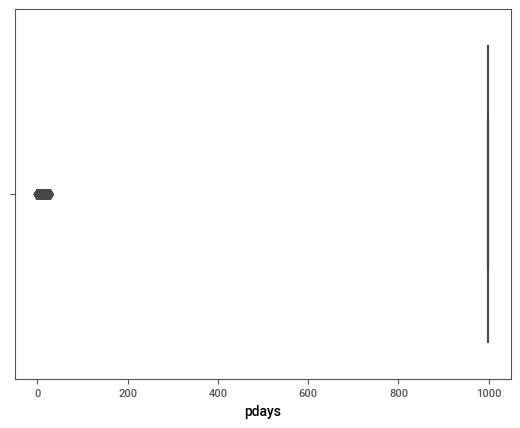

In [74]:
sns.boxplot(x=df.pdays)

### cons.conf.idx

In [75]:
#How to find outliers in cons.conf.idx
Q1=df['cons.conf.idx'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['cons.conf.idx'].quantile(0.75)
print('upper quartile',Q3)

lower quartile -42.7
upper quartile -36.4


In [76]:
# Find IQR
IQR=Q3-Q1
IQR

6.300000000000004

In [77]:
# How to find the Outliers in age
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is -52.150000000000006
upper limit is -26.949999999999992


In [78]:
# Find values above upper limit 
df.loc[df['cons.conf.idx']>upper_limit]

age         job   marital          education default housing loan  \
38154   50  management   married  university.degree      no     yes   no   
38155   37      admin.    single  university.degree      no     yes   no   
38156   59  technician    single           basic.6y      no      no   no   
38157   31      admin.   married  university.degree      no     yes   no   
38158   35      admin.   married        high.school      no     yes   no   
...    ...         ...       ...                ...     ...     ...  ...   
38596   69     retired   married           basic.4y      no     yes  yes   
38597   18     student    single           basic.6y      no      no  yes   
38598   59     retired  divorced           basic.4y      no     yes   no   
38599   37      admin.    single  university.degree      no      no   no   
38600   38     retired  divorced           basic.6y      no      no   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
38154   cellular   oct         thu       305         2      4         1   
38155   cellular   oct         thu       447         3    999         0   
38156   cellular   oct         thu        86         1    999         2   
38157   cellular   oct         thu       760         1    999         0   
38158   cellular   oct         thu       194         1      4         1   
...          ...   ...         ...       ...       ...    ...       ...   
38596   cellular   oct         fri       257         3    999         0   
38597   cellular   oct         fri       368         2    999         0   
38598  telephone   oct         fri       152         4    999         0   
38599   cellular   oct         fri       416         2    999         0   
38600  telephone   oct         fri       177         2    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
38154      success          -3.4          92.431          -26.9      0.754   
38155  nonexistent          -3.4          92.431          -26.9      0.754   
38156      failure          -3.4          92.431          -26.9      0.754   
38157  nonexistent          -3.4          92.431          -26.9      0.754   
38158      success          -3.4          92.431          -26.9      0.754   
...            ...           ...             ...            ...        ...   
38596  nonexistent          -3.4          92.431          -26.9      0.720   
38597  nonexistent          -3.4          92.431          -26.9      0.720   
38598  nonexistent          -3.4          92.431          -26.9      0.720   
38599  nonexistent          -3.4          92.431          -26.9      0.720   
38600  nonexistent          -3.4          92.431          -26.9      0.720   

       nr.employed    y  
38154       5017.5  yes  
38155       5017.5  yes  
38156       5017.5   no  
38157       5017.5   no  
38158       5017.5  yes  
...            ...  ...  
38596       5017.5  yes  
38597       5017.5  yes  
38598       5017.5   no  
38599       5017.5  yes  
38600       5017.5   no  

[446 rows x 21 columns]

In [79]:
# find percentage of outliers 
len(df.loc[df['cons.conf.idx']>upper_limit])/len(df)

0.010831552360598407

In [80]:
len(df.loc[df['cons.conf.idx']>upper_limit])/len(df)*100

1.0831552360598407

### Since data is not normal and percentage of outliers is less than 5%,it will replace these outliers with median.



In [81]:
df.loc[df['cons.conf.idx']>upper_limit,'cons.conf.idx']=df['cons.conf.idx'].median()

#### Check if the outliers were replaced by plotting a graph



<Axes: xlabel='cons.conf.idx'>

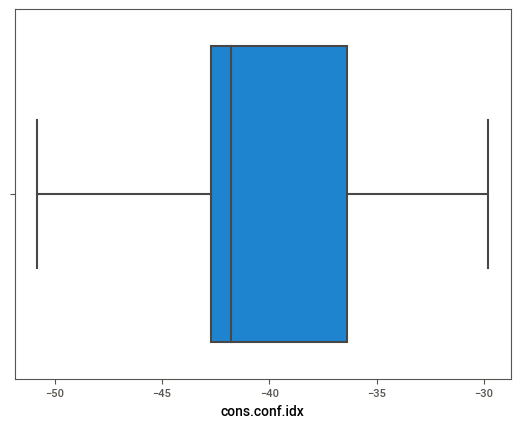

In [82]:
sns.boxplot(x=df['cons.conf.idx'])

# Converting categorical data into numerical data

### Label Encoder

In [83]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [84]:
data1=df.copy()

In [85]:
## Using label encoder to convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data1.job=lc.fit_transform(data1.job)
data1.marital=lc.fit_transform(data1.marital)
data1.education=lc.fit_transform(data1.education)
data1.default=lc.fit_transform(data1.default)
data1.housing=lc.fit_transform(data1.housing)
data1.loan=lc.fit_transform(data1.loan)
data1.contact=lc.fit_transform(data1.contact)
data1.month=lc.fit_transform(data1.month)
data1.day_of_week=lc.fit_transform(data1.day_of_week)
data1.poutcome=lc.fit_transform(data1.poutcome)


In [86]:
df.head(3)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no

In [87]:
data1.head(3)

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         1    999         0         1           1.1   
1            1       149         1    999         0         1           1.1   
2            1       226         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no

In [88]:
# Target column "y" replaced by no as 0 and yes as 1
# Replace yes--1 and no--0


In [89]:
data1['y']=data1.y.map({'yes':1,'no':0})

In [90]:
data1.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         1    999         0         1           1.1   
1            1       149         1    999         0         1           1.1   
2            1       226         1    999         0         1           1.1   
3            1       151         1    999         0         1           1.1   
4            1       307         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0

# Scaling

### Scaling is important to transform continuos data into certain scale

In [91]:
# min max scaler 
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
data1[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]=scaling.fit_transform(data1[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']])



In [92]:
data1.head()

age       job   marital  education  default  housing  loan  contact  \
0  0.750000  0.272727  0.333333   0.000000      0.0      0.0   0.0      1.0   
1  0.769231  0.636364  0.333333   0.428571      0.5      0.0   0.0      1.0   
2  0.384615  0.636364  0.333333   0.428571      0.0      1.0   0.0      1.0   
3  0.442308  0.000000  0.333333   0.142857      0.0      0.0   0.0      1.0   
4  0.750000  0.636364  0.333333   0.428571      0.0      0.0   1.0      1.0   

      month  day_of_week  duration  campaign  pdays  previous  poutcome  \
0  0.666667         0.25  0.053070       0.0    1.0       0.0       0.5   
1  0.666667         0.25  0.030297       0.0    1.0       0.0       0.5   
2  0.666667         0.25  0.045954       0.0    1.0       0.0       0.5   
3  0.666667         0.25  0.030704       0.0    1.0       0.0       0.5   
4  0.666667         0.25  0.062424       0.0    1.0       0.0       0.5   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0        0.9375        0.698753       0.685714   0.957379     0.859735  0  
1        0.9375        0.698753       0.685714   0.957379     0.859735  0  
2        0.9375        0.698753       0.685714   0.957379     0.859735  0  
3        0.9375        0.698753       0.685714   0.957379     0.859735  0  
4        0.9375        0.698753       0.685714   0.957379     0.859735  0

In [93]:
new_data=data1

# Feature Engineering

In [94]:
# Check for multicollinearity
new_data.corr()

age       job   marital  education   default   housing  \
age             1.000000 -0.013276 -0.388142  -0.096353  0.190914 -0.003958   
job            -0.013276  1.000000  0.027829   0.134159 -0.028282  0.006873   
marital        -0.388142  0.027829  1.000000   0.109195 -0.079432  0.010499   
education      -0.096353  0.134159  0.109195   1.000000 -0.186811  0.016891   
default         0.190914 -0.028282 -0.079432  -0.186811  1.000000 -0.015790   
housing        -0.003958  0.006873  0.010499   0.016891 -0.015790  1.000000   
loan           -0.007726 -0.010161  0.005806   0.006441 -0.003823  0.044272   
contact         0.032989 -0.025054 -0.054527  -0.105722  0.135275 -0.082098   
month          -0.030454 -0.033007 -0.007622  -0.082739 -0.015787 -0.018050   
day_of_week    -0.020661 -0.000868  0.002174  -0.017989 -0.008660  0.003339   
duration       -0.003773 -0.006408  0.010278  -0.015086 -0.011805 -0.007688   
campaign        0.015501 -0.006865 -0.007189   0.000406  0.032809 -0.011074   
pdays           0.006086 -0.028494 -0.037955  -0.046656  0.080086 -0.010539   
previous       -0.021825  0.021007  0.038708   0.038880 -0.102458  0.021293   
poutcome        0.016569  0.011485  0.001905   0.016987  0.023437 -0.011771   
emp.var.rate    0.070892 -0.008443 -0.084142  -0.043695  0.203257 -0.060248   
cons.price.idx  0.036791 -0.016122 -0.057431  -0.081499  0.168076 -0.080579   
cons.conf.idx   0.101042  0.048981 -0.039707   0.079895  0.044036 -0.035700   
euribor3m       0.083740 -0.008024 -0.091881  -0.036321  0.195335 -0.059283   
nr.employed     0.067970 -0.019728 -0.086134  -0.041455  0.189846 -0.045892   
y              -0.020295  0.025248  0.046249   0.057776 -0.099364  0.011613   

                    loan   contact     month  day_of_week  duration  campaign  \
age            -0.007726  0.032989 -0.030454    -0.020661 -0.003773  0.015501   
job            -0.010161 -0.025054 -0.033007    -0.000868 -0.006408 -0.006865   
marital         0.005806 -0.054527 -0.007622     0.002174  0.010278 -0.007189   
education       0.006441 -0.105722 -0.082739    -0.017989 -0.015086  0.000406   
default        -0.003823  0.135275 -0.015787    -0.008660 -0.011805  0.032809   
housing         0.044272 -0.082098 -0.018050     0.003339 -0.007688 -0.011074   
loan            1.000000 -0.008589 -0.005738    -0.009345 -0.000970  0.005119   
contact        -0.008589  1.000000  0.276499    -0.009614 -0.026665  0.077387   
month          -0.005738  0.276499  1.000000     0.027683  0.003637 -0.062128   
day_of_week    -0.009345 -0.009614  0.027683     1.000000  0.021990 -0.038254   
duration       -0.000970 -0.026665  0.003637     0.021990  1.000000 -0.071765   
campaign        0.005119  0.077387 -0.062128    -0.038254 -0.071765  1.000000   
pdays           0.000371  0.117999 -0.047885    -0.009531 -0.047556  0.052606   
previous       -0.001374 -0.212903  0.103151    -0.004103  0.020600 -0.079182   
poutcome       -0.001486  0.118773 -0.065010     0.018733  0.033385  0.032607   
emp.var.rate    0.001840  0.393730 -0.178724     0.033288 -0.027941  0.150786   
cons.price.idx -0.002474  0.591596 -0.004183     0.005674  0.005303  0.127826   
cons.conf.idx  -0.009649  0.282537 -0.049487     0.041327 -0.011624 -0.000521   
euribor3m       0.000125  0.399892 -0.117216     0.039064 -0.032861  0.135169   
nr.employed     0.003910  0.269285 -0.221370     0.028414 -0.044672  0.144129   
y              -0.004922 -0.144774 -0.006051     0.015970  0.405297 -0.066361   

                   pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
age             0.006086 -0.021825  0.016569      0.070892        0.036791   
job            -0.028494  0.021007  0.011485     -0.008443       -0.016122   
marital        -0.037955  0.038708  0.001905     -0.084142       -0.057431   
education      -0.046656  0.038880  0.016987     -0.043695       -0.081499   
default         0.080086 -0.102458  0.023437      0.203257        0.168076   
housing        -0.010539  0.021

<Axes: >

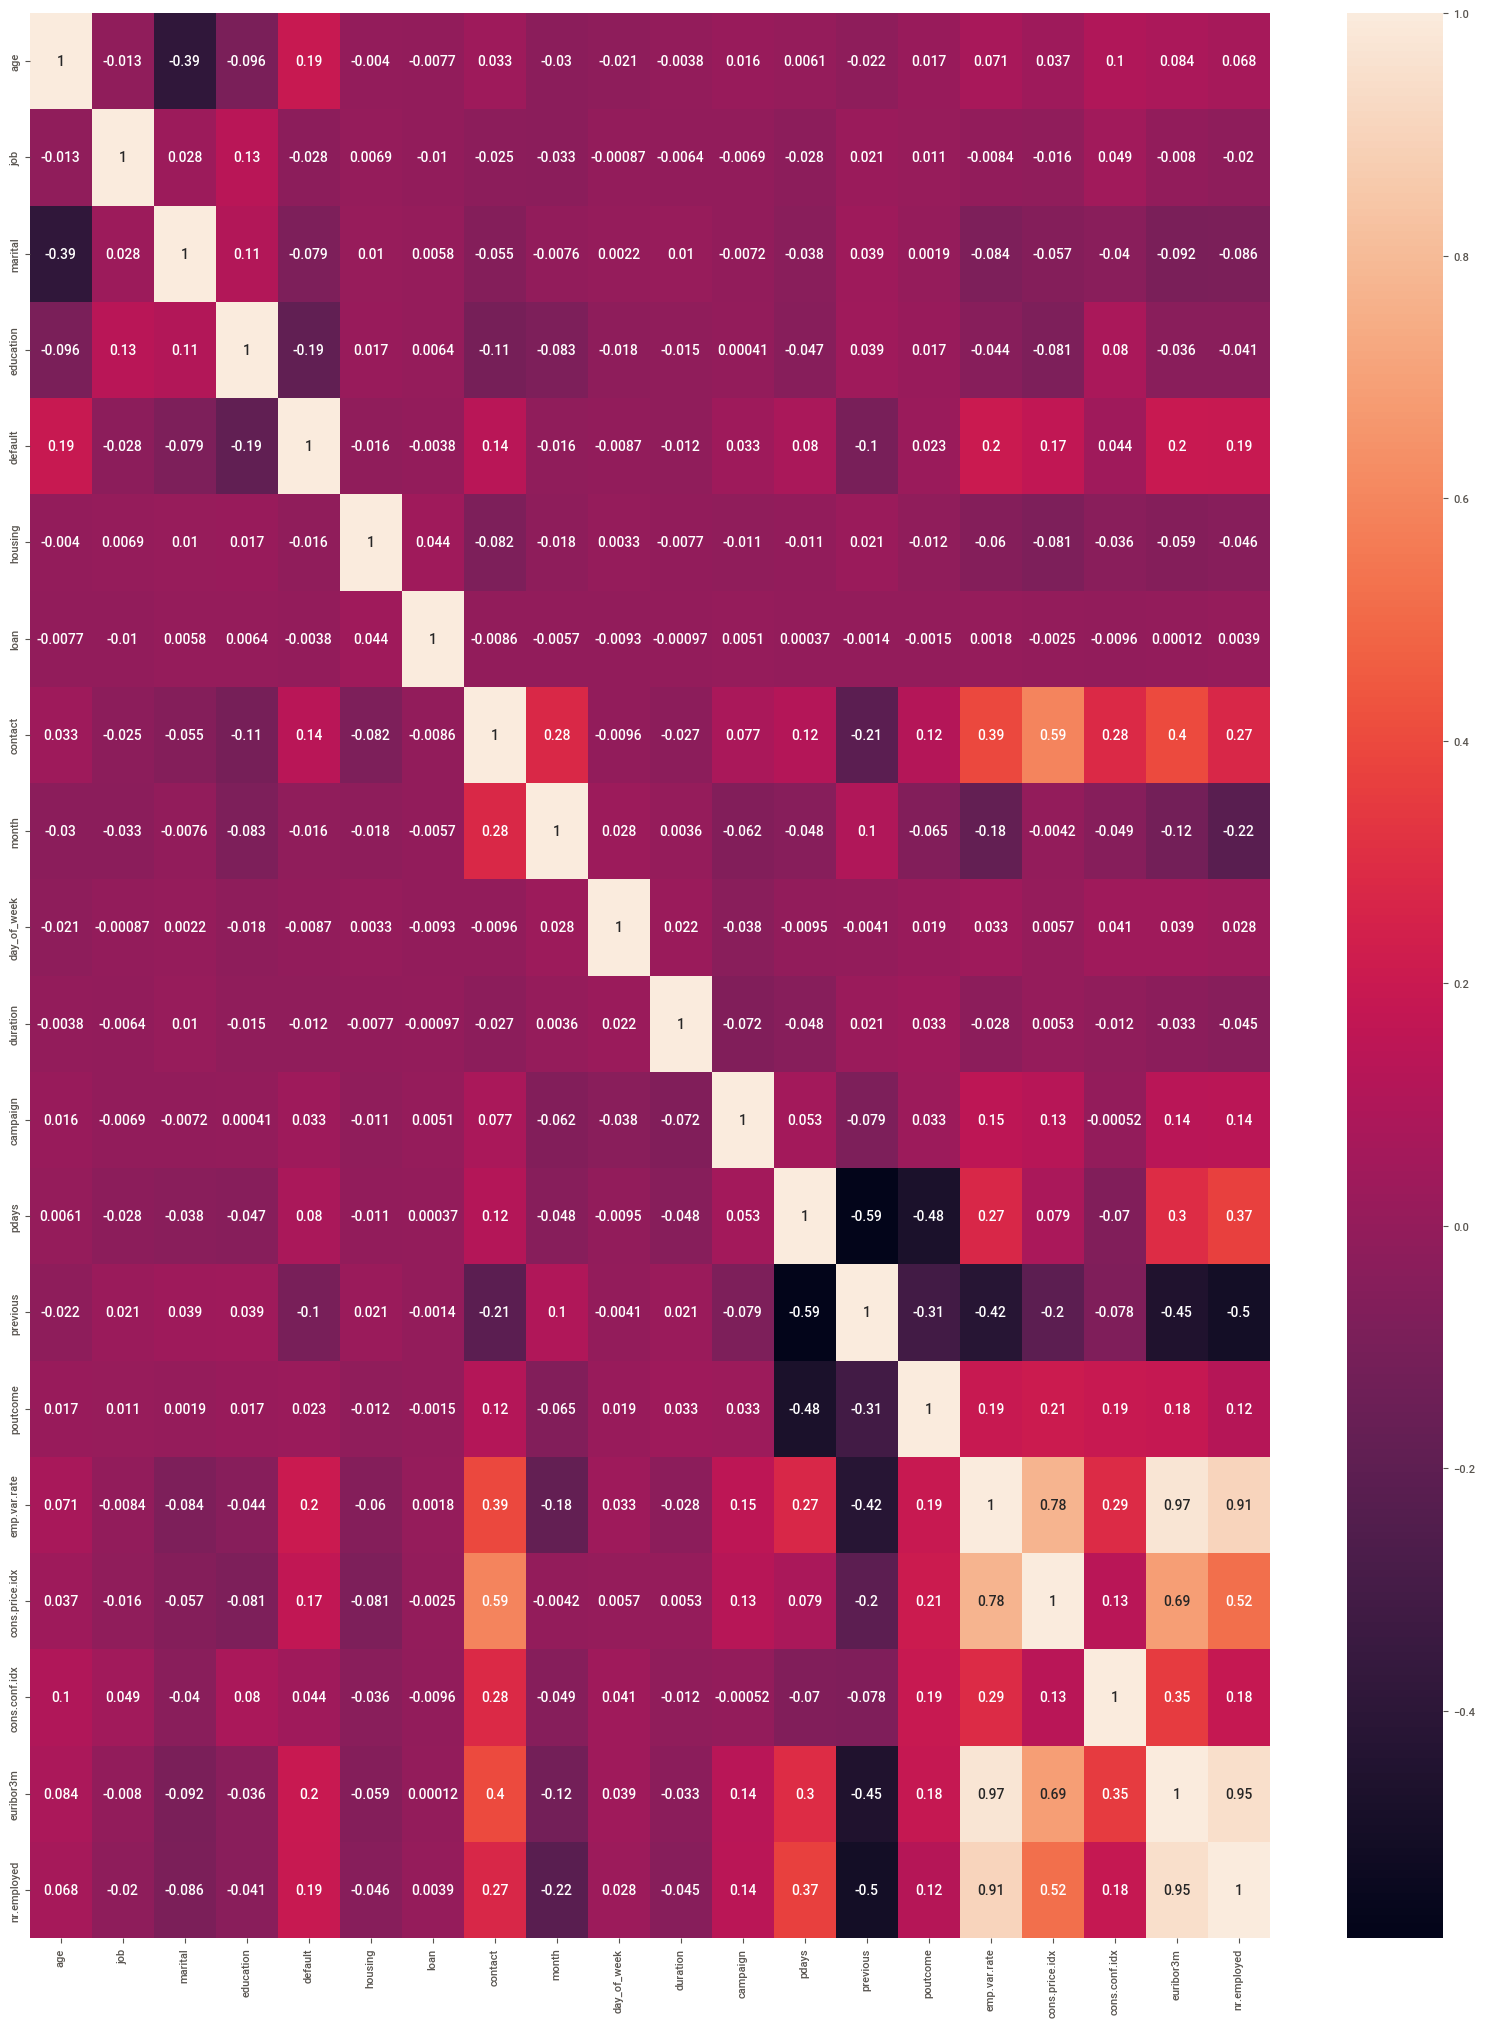

In [95]:
# draw graph
plt.figure(figsize=(20,25))
sns.heatmap(new_data.drop("y",axis=1).corr(),annot=True)

In [96]:
# deleting the correlating columns

In [97]:
col=['emp.var.rate','euribor3m']
new_data.drop(columns=col,axis=1,inplace=True)

# Data Analysis

**Summary**
     
     * The dataset contains 41188 rows with 21 features, that including 13 categorical and 8 numerical columns.
     
     * Those features include 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month',                    'day_of_week', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 
       'cons.conf.idx','euribor3m', 'nr.employed'.
     
     * When comparing all age groups, people aged 31 to 40 are more likely to have a chance to get a term deposit.
     
     * On the other hand, people aged 60 to 90 have less of a chance to get the term deposit.
     
     * In the job category, 'admin' accounts for 25% of the records in this dataset.
     
     * After 'admin,' blue-collar customers and technicians have a chance to claim a term deposit.
     
     * Married people have the highest chances of buying a product, followed by singles.
     
     * The majority of the customers have attained a higher university degree.
     
     * The "default" variable is essential for credit risk assessment and financial analysis. It helps financial 
       institutions and credit agencies evaluate the creditworthiness of individuals and businesses by determining whether 
       they are likely to repay their debts on time or pose a higher credit risk due to a history of defaulting on payments.
     
     * The majority of customers do not have any defaults on their credit.
     
     * The majority of customers, comprising 21,576 members, have taken out housing loans.
     
     * Out of the total, 18,622 members do not have any housing loans. And 990 are unknowns.
     
     * An overwhelming 82% of the customers do not have a personal loan.
     
     * Cellular connections are preferred by the majority of customers over traditional telephone lines.
     
     * The last contact month of the year is May, with a total of 13,769 occurrences.
     
     * On Thursdays, the last contact day of the week, there were 8,623 occurrences.
     
     * The last contact duration, measured in seconds and represented numerically, ranges from 0.0 to 1.0 thousand 
     (or 1,000) seconds.
     
     * This variable campaign is essential for tracking and analyzing the level of engagement and interaction between the  marketing team and a particular client during a specific marketing campaign. It can help assess the effectiveness of the    campaign and customer engagement strategies.

     * Out of a total, 39,673 customer records indicates that the client was not previously contacted.
     
     * The number of contacts made with this client prior to the current campaign was zero.
     
     * In the previous marketing campaign, 86% of them are now untraceable.
     
     * The employment variation rate, measured quarterly, currently stands at its maximum, at 1.4.
     
     * In this dataset, the monthly consumer price index fluctuates between 93.0 and 93.994.
     
     * The consumer confidence index, a monthly indicator, is at its highest at two points: -36.47 and -42.7.
     
     * The daily indicator for the EURIBOR 3-month rate reached its maximum point at 4.857.
     
     * The number of employees, measured quarterly, has significantly increased to 5,228.1 thousand.
     
     * The majority of clients have not opted for a term deposit.

###  Task 2:-Create a predictive model which will help the bank marketing team to know which client subscribed to a term deposit or not .

## Model Building 

## Split the  data into train and test

In [247]:
# Split data into x & y 
x=new_data.drop('y',axis=1)
y=new_data[["y"]]

In [248]:
# split data for trainign & testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [249]:
print(x_train.shape)
print(x_test.shape)

(28823, 18)
(12353, 18)


In [250]:
data1.shape

(41176, 19)

# Logistic regression

In [251]:
# import the Logistic regression model 
from sklearn.linear_model import LogisticRegression 
## initiallisation of the model
model=LogisticRegression()
# train model model with x_train, y_train
model.fit(x_train,y_train)

LogisticRegression()

In [252]:
##make predictions by testing data 
# evaluate by using the x_test 
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [253]:
x_train

age       job   marital  education  default  housing  loan  \
39478  0.403846  0.454545  0.000000   0.428571      0.0      0.0   0.0   
28422  0.634615  0.090909  0.333333   0.428571      0.5      0.0   0.0   
28808  0.211538  0.818182  0.666667   0.714286      0.0      0.5   0.5   
14844  0.269231  0.909091  0.666667   0.428571      0.0      1.0   1.0   
39320  0.807692  0.909091  0.333333   0.285714      0.0      1.0   0.0   
...         ...       ...       ...        ...      ...      ...   ...   
31028  0.365385  0.000000  0.666667   0.428571      0.0      0.0   0.0   
30289  0.576923  0.090909  0.666667   0.142857      0.0      0.0   0.0   
6638   0.596154  0.000000  0.666667   0.428571      0.0      1.0   0.0   
35353  0.230769  0.000000  0.666667   0.428571      0.0      0.0   0.0   
23727  0.250000  0.000000  0.333333   0.857143      0.0      1.0   0.0   

       contact     month  day_of_week  duration  campaign     pdays  previous  \
39478      1.0  0.000000         0.75  0.032940  0.000000  0.006006  0.285714   
28422      0.0  0.000000         0.50  0.068930  0.000000  1.000000  0.000000   
28808      0.0  0.000000         0.50  0.014437  0.018182  1.000000  0.142857   
14844      0.0  0.333333         1.00  0.009150  0.000000  1.000000  0.000000   
39320      0.0  0.555556         0.25  0.051647  0.018182  1.000000  0.000000   
...        ...       ...          ...       ...       ...       ...       ...   
31028      0.0  0.666667         0.75  0.038430  0.000000  1.000000  0.000000   
30289      0.0  0.000000         0.50  0.062830  0.000000  1.000000  0.000000   
6638       1.0  0.666667         1.00  0.055917  0.018182  1.000000  0.000000   
35353      0.0  0.666667         0.00  0.028060  0.018182  1.000000  0.142857   
23727      0.0  0.111111         0.50  0.002643  0.400000  1.000000  0.000000   

       poutcome  cons.price.idx  cons.conf.idx  nr.employed  
39478       1.0        0.603274       0.771429     0.170510  
28422       0.5        0.340608       0.176190     0.512287  
28808       0.0        0.340608       0.176190     0.512287  
14844       0.5        0.669135       0.385714     1.000000  
39320       0.5        0.455183       0.761905     0.170510  
...         ...             ...            ...          ...  
31028       0.5        0.269680       0.219048     0.512287  
30289       0.5        0.340608       0.176190     0.512287  
6638        0.5        0.698753       0.685714     0.859735  
35353       0.0        0.269680       0.219048     0.512287  
23727       0.5        0.484412       0.700000     1.000000  

[28823 rows x 18 columns]

In [254]:
y_test

y
20472  0
18411  0
5693   0
30318  0
33418  0
...   ..
17578  0
11380  0
25917  0
24578  0
14164  0

[12353 rows x 1 columns]

In [255]:
df=y_test.copy()

In [256]:
df['y_pred']=y_pred

In [257]:
df

y  y_pred
20472  0       0
18411  0       0
5693   0       0
30318  0       0
33418  0       0
...   ..     ...
17578  0       0
11380  0       0
25917  0       0
24578  0       0
14164  0       0

[12353 rows x 2 columns]

# Evaluate the model

In [258]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [259]:
confusion_matrix(y_test,y_pred)

array([[10722,   246],
       [  881,   504]], dtype=int64)

In [260]:
accuracy_score(y_test,y_pred)

0.9087671011090424

In [261]:
precision_score(y_test,y_pred)

0.672

In [262]:
recall_score(y_test,y_pred)

0.36389891696750903

In [263]:
f1_score(y_test,y_pred)

0.4721311475409837

In [264]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10968
           1       0.67      0.36      0.47      1385

    accuracy                           0.91     12353
   macro avg       0.80      0.67      0.71     12353
weighted avg       0.90      0.91      0.90     12353



# ROC-AUC Method 

* Using ROC(Reciever operator charateristic) we evaluate our model at different thresholds.
* AUC(Area under the curve)tells us about the strength of the model by measuring area below the ROC curve.

In [265]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.6707350164706254


In [266]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [267]:
conf_matrix = confusion_matrix(y_test, y_pred)


In [268]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(x_test)[:, 1] #This slicing notation used to extract 
#the predicted probabilities for the positive class (class 1) from the result of model.predict_proba(x_test).

In [269]:
y_pred_prob

array([0.02053388, 0.03000449, 0.00869693, ..., 0.01491698, 0.10938656,
       0.01245187])

In [270]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # You need predicted probabilities for ROC
# fpr - false posittive rate, tpr - true positive rate

Text(0, 0.5, 'Predicted labels')

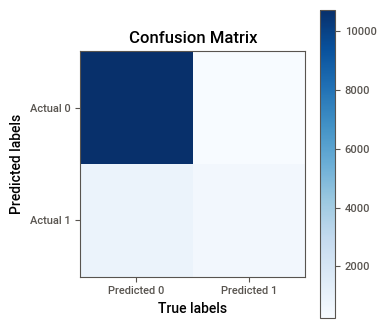

In [271]:
# Plot the confusion matrix
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel('True labels')
plt.ylabel('Predicted labels')


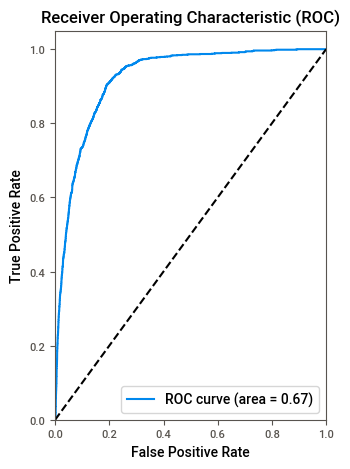

In [272]:
# Plot the ROC curve
plt.subplot(1, 2, 2)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0, 1], [0, 1], 'k--') # This line adds a diagonal dashed line from (0,0) to (1,1) to the plot.
#This diagonal line represents the ROC curve of a random classifier and serves as a reference line. 
# A good classifier should have an ROC curve above this line.

plt.xlim([0.0, 1.0]) # This sets the x-axis limits of the plot to be between 0 and 1, 
# which are the valid range for false positive rates.

plt.ylim([0.0, 1.05])# This sets the y-axis limits of the plot to be between 0 and 1.05,
# allowing a little extra space above 1 for the true positive rate.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

plt.legend(loc="lower right")# this ensures that the legend appears in the lower-right corner of 
# the plot and contains the label information you specified earlier. 

plt.tight_layout()

# KNN Model

In [273]:
# Split data into x & y 
x=new_data.drop('y',axis=1)
y=new_data[["y"]]

In [274]:
# split data for trainign & testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [275]:
 from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

# Evaluate the model

In [276]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report ,f1_score

In [277]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[10681,   287],
       [ 1015,   370]], dtype=int64)

In [278]:
# accuracy score
accuracy_score(y_test,y_pred)

0.894600501902372

In [279]:
# Recall
recall_score(y_test,y_pred)

0.26714801444043323

In [280]:
#precision
precision_score(y_test,y_pred)

0.563165905631659

In [281]:
f1_score(y_test,y_pred)

0.3623898139079334

In [282]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.56      0.27      0.36      1385

    accuracy                           0.89     12353
   macro avg       0.74      0.62      0.65     12353
weighted avg       0.87      0.89      0.88     12353



In [283]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.6204904915382327


In [284]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(x_test)[:, 1]#This slicing notation used to extract 
#the predicted probabilities for the positive class (class 1) from the result of model.predict_proba(x_test).

In [285]:
y_pred_prob

array([0.02053388, 0.03000449, 0.00869693, ..., 0.01491698, 0.10938656,
       0.01245187])

In [286]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # You need predicted probabilities for ROC
# fpr - false posittive rate, tpr - true positive rate

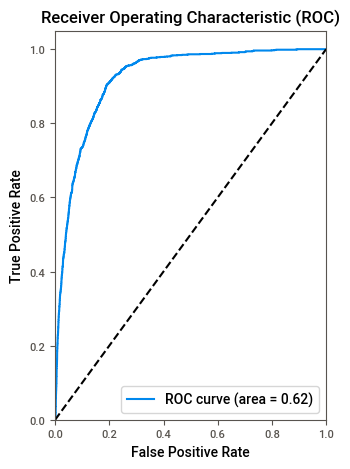

In [287]:
from sklearn.metrics import roc_curve, roc_auc_score
# Plot the ROC curve
plt.subplot(1, 2, 2)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0, 1], [0, 1], 'k--') # This line adds a diagonal dashed line from (0,0) to (1,1) to the plot.
#This diagonal line represents the ROC curve of a random classifier and serves as a reference line. 
# A good classifier should have an ROC curve above this line.

plt.xlim([0.0, 1.0]) # This sets the x-axis limits of the plot to be between 0 and 1, 
# which are the valid range for false positive rates.

plt.ylim([0.0, 1.05])# This sets the y-axis limits of the plot to be between 0 and 1.05,
# allowing a little extra space above 1 for the true positive rate.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

plt.legend(loc="lower right")# this ensures that the legend appears in the lower-right corner of 
# the plot and contains the label information you specified earlier. 

plt.tight_layout()

# Support vector Classifier

In [288]:
# Split data into x & y 
x=new_data.drop('y',axis=1)
y=new_data[["y"]]

In [289]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=3)

## Balancing data

In [290]:
new_data.y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

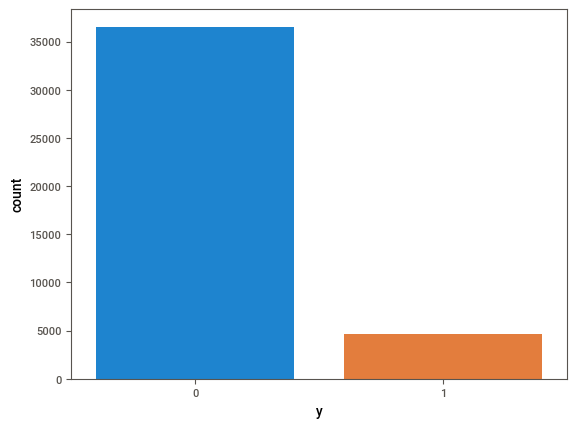

In [291]:
sns.countplot(data=new_data,x="y")

# Smote
* Smote is used to balance the data by creating artificial data of minority class.
* Smote is applied after train_test_split process.
* Smote is applied only on train data

In [292]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [293]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [294]:
# Smote is always applied on train data(x_train and y_train)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [295]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({'y': 1})
SMOTE Classes Counter({'y': 1})


In [296]:
new_data.y.unique()

array([0, 1], dtype=int64)

In [297]:
y_smote.value_counts()

y
0    27399
1    27399
dtype: int64

In [298]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [299]:
# Predict output for X_test
y_pred=svclassifier.predict(x_test)

# Model evaluation

In [300]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.8513697299397708

In [301]:
f1_score(y_test,y_pred)

0.5621064682312535

In [302]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9138
           1       0.42      0.85      0.56      1156

    accuracy                           0.85     10294
   macro avg       0.70      0.85      0.74     10294
weighted avg       0.92      0.85      0.87     10294



In [303]:
# to see whether the model is generalized model or not

In [304]:
y_pred=svclassifier.predict(x_test)
y_train_pred=svclassifier.predict(x_train)

# Testing data

In [305]:
accuracy_score(y_pred,y_test)

0.8513697299397708

In [306]:
recall_score(y_pred,y_test)

0.42001710863986313

In [307]:
precision_score(y_pred,y_test)

0.8494809688581315

In [308]:
confusion_matrix(y_test,y_pred)

array([[7782, 1356],
       [ 174,  982]], dtype=int64)

In [309]:
f1_score(y_pred,y_test)

0.5621064682312535

In [310]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9138
           1       0.42      0.85      0.56      1156

    accuracy                           0.85     10294
   macro avg       0.70      0.85      0.74     10294
weighted avg       0.92      0.85      0.87     10294



# Training data

In [311]:
accuracy_score(y_train,y_train_pred)

0.8665889514927789

In [312]:
recall_score(y_train,y_train_pred)

0.9066896353718059

In [313]:
precision_score(y_train,y_train_pred)

0.45419243492017836

In [314]:
f1_score(y_train,y_train_pred)

0.605212725182062

In [315]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     27399
           1       0.45      0.91      0.61      3483

    accuracy                           0.87     30882
   macro avg       0.72      0.88      0.76     30882
weighted avg       0.93      0.87      0.88     30882



In [316]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.8505448179812654


In [317]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(x_test)[:, 1]#This slicing notation used to extract 
#the predicted probabilities for the positive class (class 1) from the result of model.predict_proba(x_test).

In [318]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # You need predicted probabilities for ROC
# fpr - false posittive rate, tpr - true positive rate

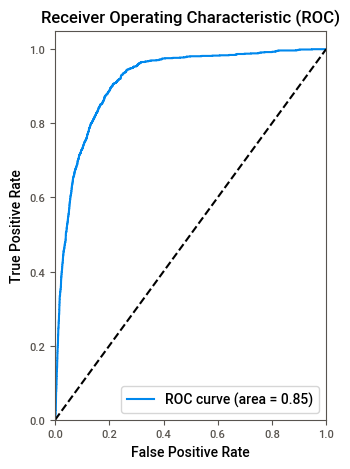

In [319]:
from sklearn.metrics import roc_curve, roc_auc_score
# Plot the ROC curve
plt.subplot(1, 2, 2)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0, 1], [0, 1], 'k--') # This line adds a diagonal dashed line from (0,0) to (1,1) to the plot.
#This diagonal line represents the ROC curve of a random classifier and serves as a reference line. 
# A good classifier should have an ROC curve above this line.

plt.xlim([0.0, 1.0]) # This sets the x-axis limits of the plot to be between 0 and 1, 
# which are the valid range for false positive rates.

plt.ylim([0.0, 1.05])# This sets the y-axis limits of the plot to be between 0 and 1.05,
# allowing a little extra space above 1 for the true positive rate.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

plt.legend(loc="lower right")# this ensures that the legend appears in the lower-right corner of 
# the plot and contains the label information you specified earlier. 

plt.tight_layout()

# Decision tree classifier

In [320]:
# Split data into x & y 
x=new_data.drop('y',axis=1)
y=new_data[["y"]]

In [321]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=3)

In [322]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [323]:
y_train_predict=model.predict(x_train)#predicting training data to check training performance 
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model evaluation

In [324]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_train,y_train_predict)

1.0

In [232]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.8766271614532738

# Hyperparameter tuning Decision tree clasifier

In [327]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
}

In [328]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = RandomizedSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_smote,y_smote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best paramters: {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 11, 'criterion': 'entropy'})


In [329]:
tree_cv.best_score_

0.9074236285995839

In [330]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=11,min_samples_leaf= 5,min_samples_split=4,splitter='best')
model.fit(x_smote,y_smote)#training the model
y_pred=model.predict(x_test)#prediction
y_pred#predicted values 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [331]:
y_train_predict=model.predict(x_smote)#predicting training data to check training performance 
y_train_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [332]:
# Testing accuracy
accuracy_score(y_test,y_pred)

0.8764328735185545

In [333]:
# Training score
accuracy_score(y_smote,y_train_predict)

0.9306726522865798

In [334]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.8265029448494858


In [335]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(x_test)[:, 1]#This slicing notation used to extract 
#the predicted probabilities for the positive class (class 1) from the result of model.predict_proba(x_test).

In [336]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # You need predicted probabilities for ROC
# fpr - false posittive rate, tpr - true positive rate

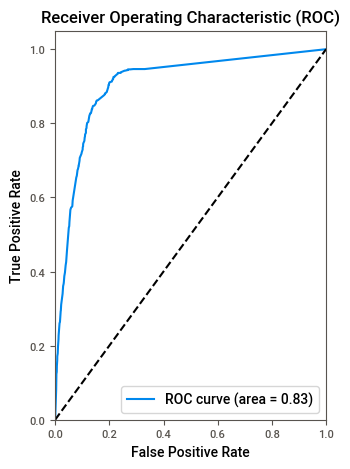

In [337]:
from sklearn.metrics import roc_curve, roc_auc_score
# Plot the ROC curve
plt.subplot(1, 2, 2)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test,y_pred)))

plt.plot([0, 1], [0, 1], 'k--') # This line adds a diagonal dashed line from (0,0) to (1,1) to the plot.
#This diagonal line represents the ROC curve of a random classifier and serves as a reference line. 
# A good classifier should have an ROC curve above this line.

plt.xlim([0.0, 1.0]) # This sets the x-axis limits of the plot to be between 0 and 1, 
# which are the valid range for false positive rates.

plt.ylim([0.0, 1.05])# This sets the y-axis limits of the plot to be between 0 and 1.05,
# allowing a little extra space above 1 for the true positive rate.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

plt.legend(loc="lower right")# this ensures that the legend appears in the lower-right corner of 
# the plot and contains the label information you specified earlier. 

plt.tight_layout()

# Random Forest

In [338]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

# Model evaluation

In [339]:
accuracy_score(y_test,y_pred)

0.9010102972605402

In [340]:
recall_score(y_test,y_pred)

0.6695501730103807

In [341]:
precision_score(y_test,y_pred)

0.5485471296952515

In [342]:
f1_score(y_test,y_pred)

0.6030385664199454

In [343]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      9138
           1       0.55      0.67      0.60      1156

    accuracy                           0.90     10294
   macro avg       0.75      0.80      0.77     10294
weighted avg       0.91      0.90      0.91     10294



In [344]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.7999206325765408


In [345]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(x_test)[:, 1]#This slicing notation used to extract 
#the predicted probabilities for the positive class (class 1) from the result of model.predict_proba(x_test).

In [346]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # You need predicted probabilities for ROC
# fpr - false posittive rate, tpr - true positive rate

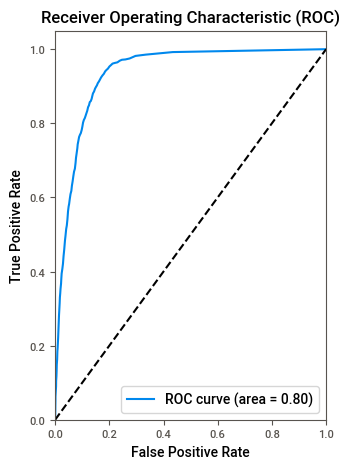

In [350]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot the ROC curve
plt.subplot(1, 2, 2)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0, 1], [0, 1], 'k--') # This line adds a diagonal dashed line from (0,0) to (1,1) to the plot.
#This diagonal line represents the ROC curve of a random classifier and serves as a reference line. 
# A good classifier should have an ROC curve above this line.

plt.xlim([0.0, 1.0]) # This sets the x-axis limits of the plot to be between 0 and 1, 
# which are the valid range for false positive rates.

plt.ylim([0.0, 1.05])# This sets the y-axis limits of the plot to be between 0 and 1.05,
# allowing a little extra space above 1 for the true positive rate.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

plt.legend(loc="lower right")# this ensures that the legend appears in the lower-right corner of 
# the plot and contains the label information you specified earlier. 

plt.tight_layout()

# Hyperparameter tuning for RandomForestclassifier

In [173]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 


In [174]:
# dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [175]:
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split=2, min_samples_leaf= 1, max_features='sqrt', max_depth=None, bootstrap=False)#passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)


In [176]:
# training accuracy
y_train_pred=rf_clf2.predict(x_train)

In [177]:
# testing accuracy
accuracy_score(y_test,y_predict)

0.902078880901496

In [178]:
# training accuracy
accuracy_score(y_train,y_train_pred)

1.0

# Bagging

In [170]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(base_estimator=KNN,n_estimators=50)
model_bag.fit(x_smote,y_smote)
y_pred=model_bag.predict(x_test)

# Model evaluation

In [171]:
accuracy_score(y_test,y_pred)

0.8186322129395764

In [172]:
recall_score(y_test,y_pred)

0.6081314878892734

In [173]:
precision_score(y_test,y_pred)

0.33207368918280583

In [174]:
f1_score(y_test,y_pred)

0.42957531316834713

In [351]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      9138
           1       0.55      0.67      0.60      1156

    accuracy                           0.90     10294
   macro avg       0.75      0.80      0.77     10294
weighted avg       0.91      0.90      0.91     10294



In [352]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.7999206325765408


In [353]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(x_test)[:, 1]#This slicing notation used to extract 
#the predicted probabilities for the positive class (class 1) from the result of model.predict_proba(x_test).

In [354]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # You need predicted probabilities for ROC
# fpr - false posittive rate, tpr - true positive rate

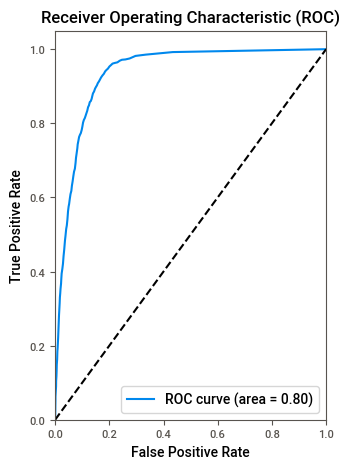

In [355]:
from sklearn.metrics import roc_curve, roc_auc_score
# Plot the ROC curve
plt.subplot(1, 2, 2)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0, 1], [0, 1], 'k--') # This line adds a diagonal dashed line from (0,0) to (1,1) to the plot.
#This diagonal line represents the ROC curve of a random classifier and serves as a reference line. 
# A good classifier should have an ROC curve above this line.

plt.xlim([0.0, 1.0]) # This sets the x-axis limits of the plot to be between 0 and 1, 
# which are the valid range for false positive rates.

plt.ylim([0.0, 1.05])# This sets the y-axis limits of the plot to be between 0 and 1.05,
# allowing a little extra space above 1 for the true positive rate.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

plt.legend(loc="lower right")# this ensures that the legend appears in the lower-right corner of 
# the plot and contains the label information you specified earlier. 

plt.tight_layout()

# Gradient Boosting

In [356]:
# Model building
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=120)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

# Model evaluation

In [357]:
accuracy_score(y_test,y_pred)

0.9151933164950457

In [358]:
recall_score(y_test,y_pred)

0.5423875432525952

In [359]:
precision_score(y_test,y_pred)

0.6457260556127703

In [360]:
f1_score(y_test,y_pred)

0.5895627644569816

In [361]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9138
           1       0.65      0.54      0.59      1156

    accuracy                           0.92     10294
   macro avg       0.79      0.75      0.77     10294
weighted avg       0.91      0.92      0.91     10294



In [183]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.7523712721734632


In [362]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(x_test)[:, 1]#This slicing notation used to extract 
#the predicted probabilities for the positive class (class 1) from the result of model.predict_proba(x_test).

In [363]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # You need predicted probabilities for ROC
# fpr - false posittive rate, tpr - true positive rate

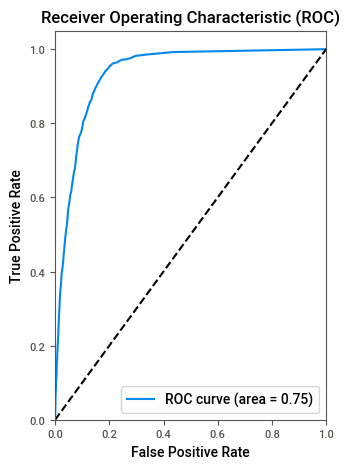

In [364]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot the ROC curve
plt.subplot(1, 2, 2)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0, 1], [0, 1], 'k--') # This line adds a diagonal dashed line from (0,0) to (1,1) to the plot.
#This diagonal line represents the ROC curve of a random classifier and serves as a reference line. 
# A good classifier should have an ROC curve above this line.

plt.xlim([0.0, 1.0]) # This sets the x-axis limits of the plot to be between 0 and 1, 
# which are the valid range for false positive rates.

plt.ylim([0.0, 1.05])# This sets the y-axis limits of the plot to be between 0 and 1.05,
# allowing a little extra space above 1 for the true positive rate.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

plt.legend(loc="lower right")# this ensures that the legend appears in the lower-right corner of 
# the plot and contains the label information you specified earlier. 

plt.tight_layout()

# XG Boost

In [365]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Model evaluation

In [366]:
accuracy_score(y_test,y_pred)

0.9103361181270643

In [367]:
recall_score(y_test,y_pred)

0.5259515570934256

In [368]:
precision_score(y_test,y_pred)

0.6185147507629705

In [369]:
f1_score(y_test,y_pred)

0.5684899485741001

In [370]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9138
           1       0.62      0.53      0.57      1156

    accuracy                           0.91     10294
   macro avg       0.78      0.74      0.76     10294
weighted avg       0.90      0.91      0.91     10294



In [371]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.7424570654803964


In [372]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(x_test)[:, 1]#This slicing notation used to extract 
#the predicted probabilities for the positive class (class 1) from the result of model.predict_proba(x_test).

In [373]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # You need predicted probabilities for ROC
# fpr - false posittive rate, tpr - true positive rate

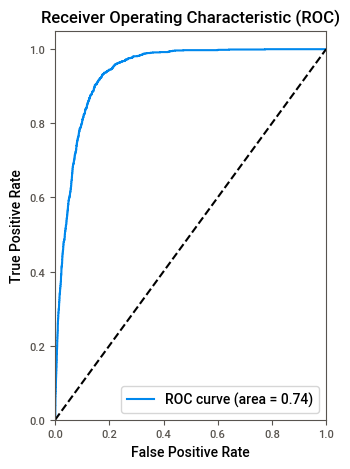

In [374]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot the ROC curve
plt.subplot(1, 2, 2)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0, 1], [0, 1], 'k--') # This line adds a diagonal dashed line from (0,0) to (1,1) to the plot.
#This diagonal line represents the ROC curve of a random classifier and serves as a reference line. 
# A good classifier should have an ROC curve above this line.

plt.xlim([0.0, 1.0]) # This sets the x-axis limits of the plot to be between 0 and 1, 
# which are the valid range for false positive rates.

plt.ylim([0.0, 1.05])# This sets the y-axis limits of the plot to be between 0 and 1.05,
# allowing a little extra space above 1 for the true positive rate.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

plt.legend(loc="lower right")# this ensures that the legend appears in the lower-right corner of 
# the plot and contains the label information you specified earlier. 

plt.tight_layout()

# Hyperparameter in XGBOOST

In [197]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [198]:
rcv.fit(x_train, y_train)
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 6.4, 'reg_alpha': 1.6, 'n_estimators': 150, 'max_depth': 13, 'learning_rate': 0.03, 'gamma': 1.6})


In [199]:
XGB2=XGBClassifier(reg_lambda= 6.4, reg_alpha= 1.6, n_estimators=150, max_depth=13,
                   learning_rate=0.03, gamma=1.6)
XGB2.fit(x_train, y_train)#training 
y_predict=XGB2.predict(x_test)#testing


In [200]:
y_train_pred=XGB2.predict(x_train)

In [201]:
accuracy_score(y_test,y_predict)

0.9164561880707208

In [202]:
recall_score(y_test,y_predict)

0.5519031141868512

In [203]:
precision_score(y_test,y_predict)

0.6510204081632653

In [204]:
f1_score(y_test,y_predict)

0.5973782771535581

In [205]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9138
           1       0.65      0.55      0.60      1156

    accuracy                           0.92     10294
   macro avg       0.80      0.76      0.78     10294
weighted avg       0.91      0.92      0.91     10294



# Final Report

In [380]:
scores=[0.9087671011090424,0.894600501902372,0.8513697299397708,0.8766271614532738,0.9010102972605402,0.8186322129395764,0.9151933164950457,0.9103361181270643]
algorithms=['LogisticRegression','KNN','SVM','DecisionTree','RandomForest','Bagging','GradientBoosting','XGBoosting']
for i in range(len(algorithms)):
    print("The accuracy Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The accuracy Score acheived using LogisticRegression is: 0.9087671011090424%
The accuracy Score acheived using KNN is: 0.894600501902372%
The accuracy Score acheived using SVM is: 0.8513697299397708%
The accuracy Score acheived using DecisionTree is: 0.8766271614532738%
The accuracy Score acheived using RandomForest is: 0.9010102972605402%
The accuracy Score acheived using Bagging is: 0.8186322129395764%
The accuracy Score acheived using GradientBoosting is: 0.9151933164950457%
The accuracy Score acheived using XGBoosting is: 0.9103361181270643%


# Summary

**After evaluating every model, it has been determined that Gradient Boosting achieves an accuracy of 91.5%, indicating its suitability as a strong model.**

# Conclusion

 **In summary, the XGBoost model, boasting an impressive 91% accuracy score, emerges as a promising solution for your problem. It surpasses the performance of other models you've experimented with and offers valuable insights into the connections between your features and the target variable.**

# Techniques Used 

**Model Selection:**
    
    Choosing the right machine learning algorithm or combination of algorithms can be a significant challenge. In the context of classification tasks, such as predicting whether a client will subscribe to a term deposit or not, commonly explored options include XGBoost, Random Forest, and Linear Regression models.
    
**Smote**

    SMOTE helps in improving the performance of machine learning models when trained on imbalanced datasets because it increases the representation of the minority class. This can lead to better model generalization and predictive accuracy for the minority class.
    
**Hyperparameter Tuning:**

    Optimizing model parameters for peak performance is facilitated through techniques such as grid search or random search in hyperparameter tuning.
    
**Ensemble Techniques:**

    Leveraging ensemble methods, such as stacking or blending multiple models like XGBoost, Random Forest, and Gradient Boosting, can significantly enhance predictive accuracy.
    
**Feature Engineering for Categorical Data:**

    Label encoding and target encoding methods are utilized to convert categorical variables into an appropriate format for modeling purposes.  

# Conclusion 

#### With a model score of 91%, your model has demonstrated robust performance in predicting whether the client subscribed to the term deposit or not. However, it is crucial to conduct thorough validation and address potential challenges and limitations meticulously. These aspects encompass evaluating the model's capacity to generalize to unseen data and ensuring its interpretability. Only after these comprehensive assessments should you consider deploying it in real-world applications.

### Task3:-Suggestions to the Bank market team to make client to subscribed a term deposit.

 ####  * Analyze your client base and segment them based on their financial needs, preferences,and interests.
    
 #### * Use client data to provide personalized recommendations for term deposit products that align with their financial goals and risk tolerance.
 
 #### * Create informative content that explains the benefits of term deposits, such as higher interest rates, safety, and guaranteed returns. Educate clients about how term deposits work.
 
 #### * Offer financial planning services to help clients understand how term deposits can fit into their overall financial strategy. Show them how term deposits can complement other investment options.
 
 #### *  Periodically offer special promotions, such as higher interest rates for longer-term deposits or limited-time offers. This can create a sense of urgency.
 
 #### * Identify clients who already have a relationship with the bank and cross-sell or upsell term deposit products to them. For example, if a client has a savings account, highlight the benefits of opening a term deposit.
 
 #### * Consider loyalty programs or rewards for clients who maintain term deposits with the bank for extended periods. Rewards could include bonus interest rates or preferential rates on other banking products.
 
 #### *  Ensure that all terms and conditions are transparent and easy for clients to understand. Clear communication builds trust.
 
 #### * Utilize social media and online advertising to reach a broader audience. Target clients who are likely to be interested in term deposits.
 
 #### * Listen to client feedback and continuously improve your term deposit offerings based on their needs and suggestions.
 
 #### * Ensure that all marketing practices and product offerings comply with relevant regulations and banking standards.